In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# DX in fin clips vs muscle

## Blank Correction & Lipid Nomalization

In [31]:
tagToId = pd.read_excel('muslce,fin clips dioxcin,furans.xlsx')
finclip = pd.read_excel('muslce,fin clips dioxcin,furans.xlsx', sheet_name= 'Fin clips')
rl_nd = finclip.loc[finclip.iloc[:, -6] == "ND", finclip.columns[-4]].dropna()

finclip.loc[rl_nd.index, finclip.columns[-5]] = rl_nd.to_numpy('float32')/np.sqrt(2)

c = finclip.columns
c = c[~c.str.contains('Unnamed')]
finclip = finclip.iloc[5:, [0]].join(finclip.iloc[5:, 2::3])
finclip.columns = c.astype('str')
id_to_name_dict = dict(zip(tagToId['Tag name'], tagToId['Fish ID']))
id_to_name_dict.update({"13-Trembleur":"13"})
finclip.rename(columns=id_to_name_dict, inplace=True)
finclip.insert(1, 'tag', 'finclip')
finclip.columns = finclip.columns.map(lambda x: str(x))
lipid_id = finclip.iloc[:, 0].str.contains('lipid', case=False)
id = finclip.loc[~lipid_id, finclip.columns[-2]].dropna().index
finclip.loc[id, finclip.columns[2:-2]] -= finclip.loc[id, finclip.columns[-2]].to_numpy('float')[:, np.newaxis]
finclip = finclip.iloc[:, :-2]
print(f'count of samples corrected to negative: {np.sum((~(finclip.iloc[:, 2:].isna() | (finclip.iloc[:, 2:] > 0)).to_numpy()))}')
print(f'position of corrected samples: {np.where((~(finclip.iloc[:, 2:].isna() | (finclip.iloc[:, 2:] > 0))).to_numpy())}')
finclip.where((finclip.iloc[:, 2:]>0) | (finclip.iloc[:, 2:].isna()), 0, inplace = True)
finclip

finclip_l = finclip.copy()

lipid_id = np.arange(len(finclip_l.CLIENT_ID))[finclip_l.CLIENT_ID.str.contains('Lipid', case = False)][0]
finclip_l.iloc[lipid_id, 2:] /= 100
id = list(range(finclip_l.shape[0]))
id.pop(lipid_id)
finclip_l.iloc[id, 2:] /= finclip_l.iloc[lipid_id, 2:]
finclip_l.head()

count of samples corrected to negative: 82
position of corrected samples: (array([ 7,  7, 18, 18, 18, 18, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30,
       30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 33, 34,
       34, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38,
       38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 41, 41,
       42, 42, 42, 42, 42, 42, 42, 42, 43, 43, 44, 45, 45, 45]), array([0, 2, 0, 4, 6, 7, 0, 5, 0, 3, 5, 7, 8, 0, 1, 3, 5, 6, 7, 8, 0, 1,
       3, 4, 5, 6, 7, 8, 0, 5, 6, 8, 6, 0, 5, 0, 5, 0, 3, 5, 7, 8, 0, 3,
       5, 7, 8, 0, 3, 5, 6, 7, 8, 0, 3, 5, 6, 7, 8, 0, 1, 3, 5, 6, 7, 8,
       5, 8, 0, 1, 2, 3, 5, 6, 7, 8, 0, 5, 6, 0, 4, 6]))


,CLIENT_ID,tag,1,2,3,4,5,7,10,11,13
5,"2,3,7,8-TCDD",finclip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"1,2,3,7,8-PECDD",finclip,NaN,NaN,NaN,77.90976,NaN,NaN,NaN,NaN,NaN
7,"1,2,3,4,7,8-HXCDD",finclip,NaN,NaN,NaN,66.725549,NaN,NaN,NaN,NaN,NaN
8,"1,2,3,6,7,8-HXCDD",finclip,NaN,NaN,NaN,40.475549,NaN,NaN,NaN,NaN,NaN
9,"1,2,3,7,8,9-HXCDD (225)",finclip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
muscle = pd.read_excel('muslce,fin clips dioxcin,furans.xlsx', sheet_name= 'Muslce')
rl_nd = muscle.loc[muscle.iloc[:, -6] == "ND", muscle.columns[-4]].dropna()
muscle.loc[rl_nd.index, muscle.columns[-5]] = rl_nd.to_numpy('float32')/np.sqrt(2)

c = muscle.columns
c = c[~c.str.contains('Unnamed')]
muscle = muscle.iloc[5:, [0]].join(muscle.iloc[5:, 2::3])
c = list(c.str.removeprefix("Nechako mort #"))
muscle.columns = c
muscle.insert(1, 'tag', 'muscle')

lipid_id = muscle.iloc[:, 0].str.contains('lipid', case=False)
id = muscle.loc[~lipid_id, muscle.columns[-2]].dropna().index
muscle.loc[id, muscle.columns[2:-2]] -= muscle.loc[id, muscle.columns[-2]].to_numpy('float')[:, np.newaxis]
muscle = muscle.iloc[:, :-2]
print(f'count of samples corrected to negative: {np.sum((~(muscle.iloc[:, 2:].isna() | (muscle.iloc[:, 2:] > 0)).to_numpy()))}')
print(f'position of corrected samples: {np.where((~(muscle.iloc[:, 2:].isna() | (muscle.iloc[:, 2:] > 0))).to_numpy())}')
muscle.where((muscle.iloc[:, 2:]>0) | (muscle.iloc[:, 2:].isna()), 0, inplace = True)


muscle_l = muscle.copy()

lipid_id = np.arange(len(muscle_l.CLIENT_ID))[muscle_l.CLIENT_ID.str.contains('Lipid', case = False)][0]
muscle_l.iloc[lipid_id, 2:] /= 100
id = list(range(muscle_l.shape[0]))
id.pop(lipid_id)
muscle_l.iloc[id, 2:] /= muscle_l.iloc[lipid_id, 2:]
muscle_l

blankcorrect_table = pd.concat([finclip, muscle], axis = 0)

blankcorrect_table['CLIENT_ID'] = blankcorrect_table["CLIENT_ID"].astype("category")
blankcorrect_table['CLIENT_ID'] = blankcorrect_table['CLIENT_ID'].cat.set_categories(finclip['CLIENT_ID'])
blankcorrect_table.sort_values(['CLIENT_ID'], inplace = True)
blankcorrect_table.reset_index(drop=True, inplace=True)
blankcorrect_table.head()

count of samples corrected to negative: 48
position of corrected samples: (array([ 7, 28, 28, 29, 29, 29, 29, 30, 30, 30, 31, 31, 32, 32, 32, 32, 33,
       33, 33, 33, 34, 34, 35, 35, 35, 35, 36, 36, 36, 37, 37, 38, 38, 39,
       39, 39, 40, 40, 40, 41, 41, 41, 42, 42, 42, 43, 43, 44]), array([3, 0, 2, 0, 1, 2, 3, 0, 2, 3, 0, 2, 0, 1, 2, 3, 0, 1, 2, 3, 0, 2,
       0, 1, 2, 3, 0, 2, 3, 0, 2, 0, 2, 0, 2, 3, 0, 2, 3, 0, 2, 3, 0, 2,
       3, 0, 2, 3]))


,CLIENT_ID,tag,1,2,3,4,5,7,10,11,13
0,"2,3,7,8-TCDD",finclip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"2,3,7,8-TCDD",muscle,NaN,0.067988,NaN,NaN,NaN,0.050988,NaN,NaN,NaN
2,"1,2,3,7,8-PECDD",muscle,NaN,0.075988,NaN,NaN,NaN,0.042988,NaN,NaN,NaN
3,"1,2,3,7,8-PECDD",finclip,NaN,NaN,NaN,1.184228,NaN,NaN,NaN,NaN,NaN
4,"1,2,3,4,7,8-HXCDD",finclip,NaN,NaN,NaN,1.014228,NaN,NaN,NaN,NaN,NaN


### lipid nomalized

In [33]:
lipid_table = pd.concat([finclip_l, muscle_l], axis = 0)
lipid_table.sort_values(['CLIENT_ID'], inplace = True)
lipid_table.reset_index(drop=True, inplace=True)
lipid_table.drop(index=[0, 1], inplace=True)
lipid_table.drop(index = lipid_table.index[lipid_table.CLIENT_ID.str.contains('WHO', case = False)], inplace=True)
lipid_table.drop(index = lipid_table.index[lipid_table.CLIENT_ID.str.contains('Total', case = False)], inplace=True)
lipid_table.drop(index = lipid_table.index[lipid_table.CLIENT_ID.str.contains('recovery', case = False)], inplace=True)
lipid_table.head()

,CLIENT_ID,tag,1,2,3,4,5,7,10,11,13
2,"1,2,3,4,6,7,8-HPCDD",muscle,NaN,2.321982,NaN,1.087142,NaN,0.453695,NaN,NaN,NaN
3,"1,2,3,4,6,7,8-HPCDD",finclip,3.008339,27.065229,NaN,148.304497,19.420116,36.39872,NaN,44.037181,76.477339
4,"1,2,3,4,6,7,8-HPCDF",muscle,NaN,0.749948,NaN,0.71821,NaN,0.259665,NaN,NaN,NaN
5,"1,2,3,4,6,7,8-HPCDF",finclip,60.36128,54.102266,NaN,123.304497,NaN,NaN,NaN,NaN,NaN
6,"1,2,3,4,7,8,9-HPCDF",finclip,NaN,NaN,NaN,154.225549,NaN,NaN,NaN,NaN,NaN


## blank corrected plots

In [34]:
blankcorrect_table.sort_values(['CLIENT_ID'], inplace = True)
blankcorrect_table.reset_index(drop=True, inplace=True)
blankcorrect_table.drop(index=[0, 1], inplace=True)
blankcorrect_table.drop(index = blankcorrect_table.index[blankcorrect_table.CLIENT_ID.str.contains('WHO', case = False)], inplace=True)
blankcorrect_table.drop(index = blankcorrect_table.index[blankcorrect_table.CLIENT_ID.str.contains('Total', case = False)], inplace=True)
blankcorrect_table.drop(index = blankcorrect_table.index[blankcorrect_table.CLIENT_ID.str.contains('recovery', case = False)], inplace=True)
blankcorrect_table.drop(index = blankcorrect_table.index[blankcorrect_table.CLIENT_ID.str.contains('lipid', case = False)], inplace=True)
blankcorrect_table.head()

,CLIENT_ID,tag,1,2,3,4,5,7,10,11,13
2,"1,2,3,7,8-PECDD",muscle,NaN,0.075988,NaN,NaN,NaN,0.042988,NaN,NaN,NaN
3,"1,2,3,7,8-PECDD",finclip,NaN,NaN,NaN,1.184228,NaN,NaN,NaN,NaN,NaN
4,"1,2,3,4,7,8-HXCDD",finclip,NaN,NaN,NaN,1.014228,NaN,NaN,NaN,NaN,NaN
5,"1,2,3,4,7,8-HXCDD",muscle,NaN,0.043988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"1,2,3,6,7,8-HXCDD",finclip,NaN,NaN,NaN,0.615228,NaN,NaN,NaN,NaN,NaN


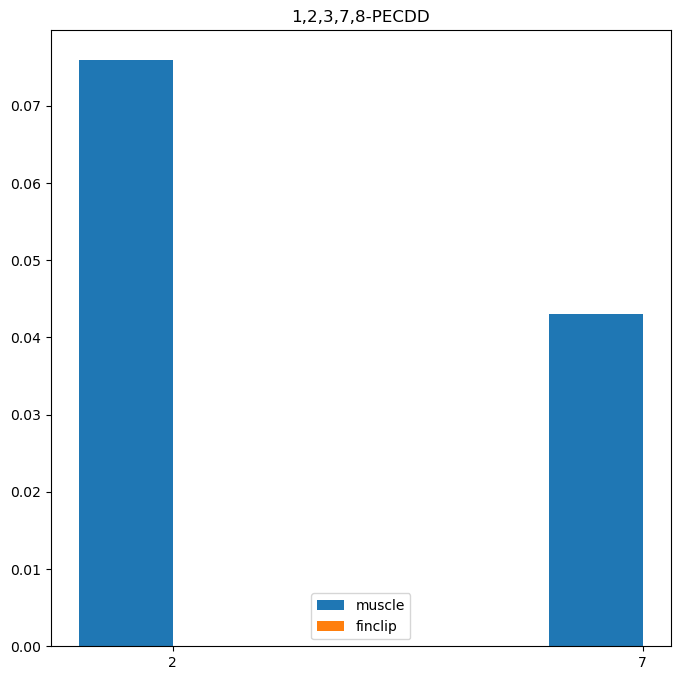

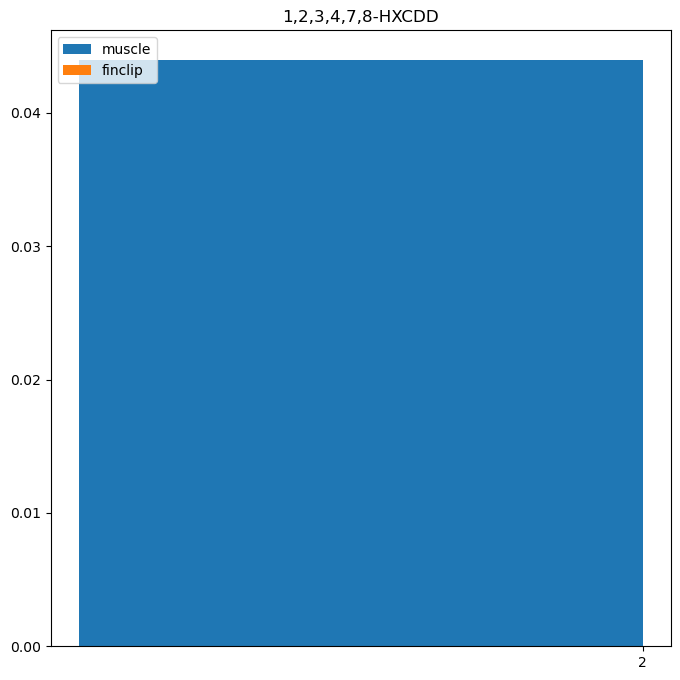

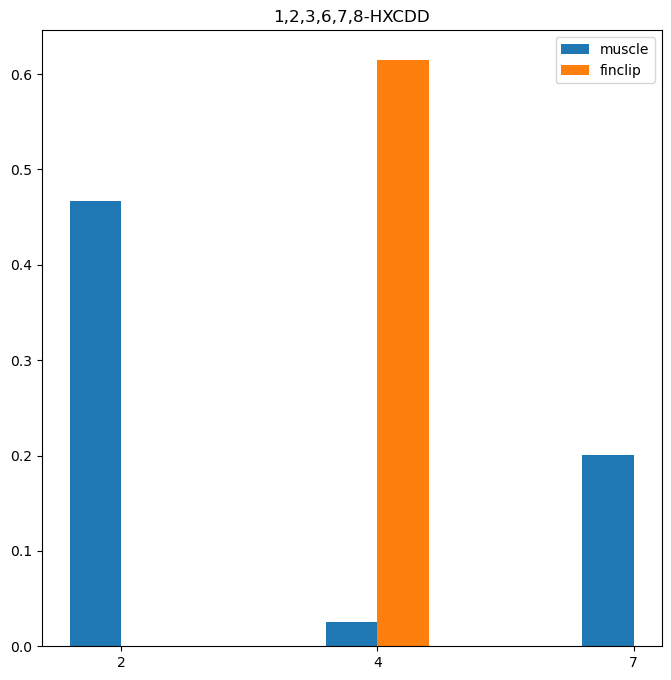

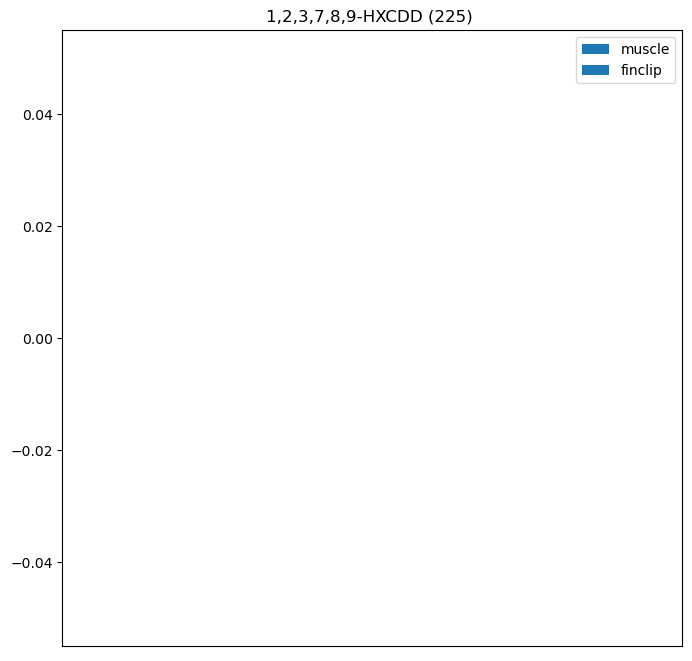

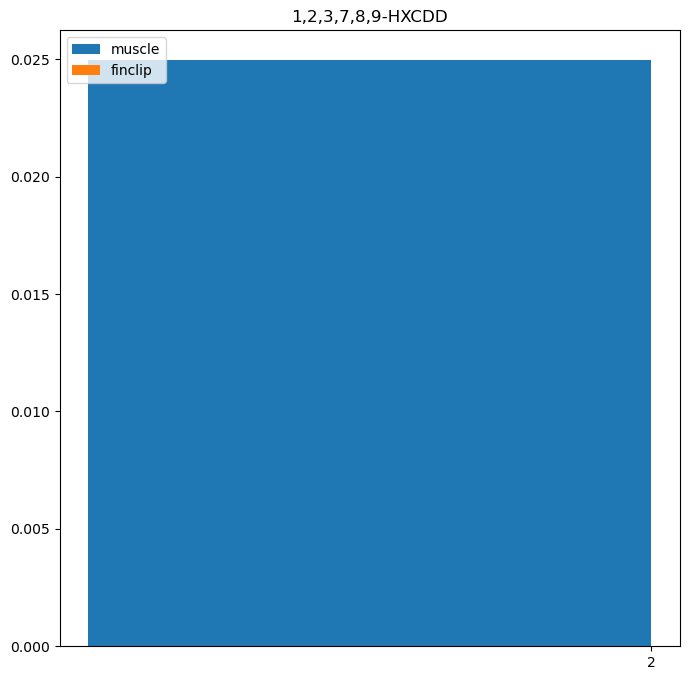

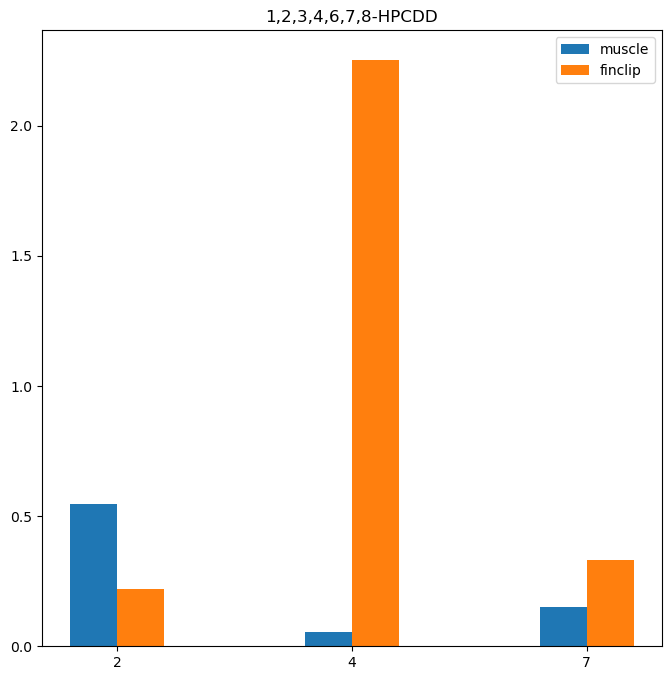

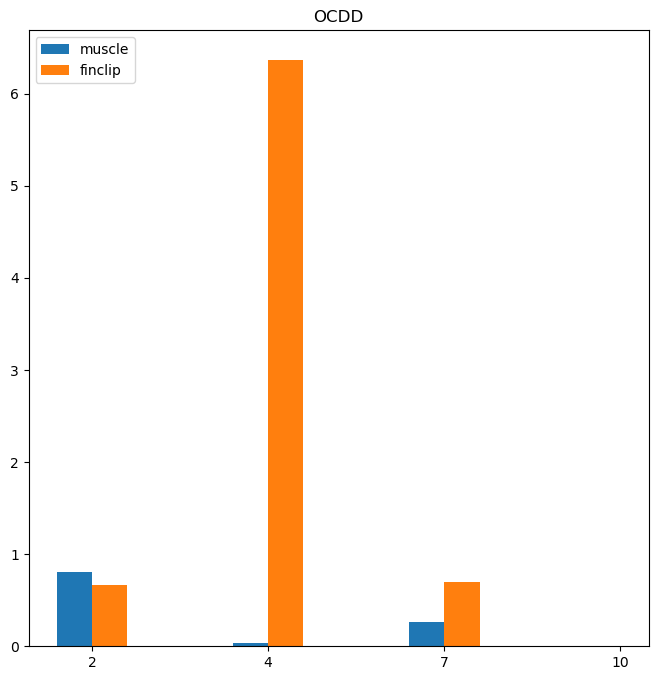

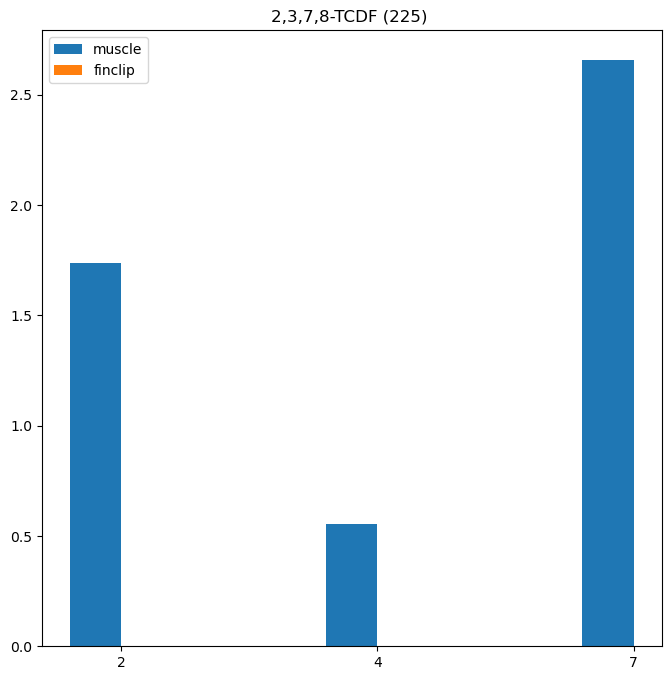

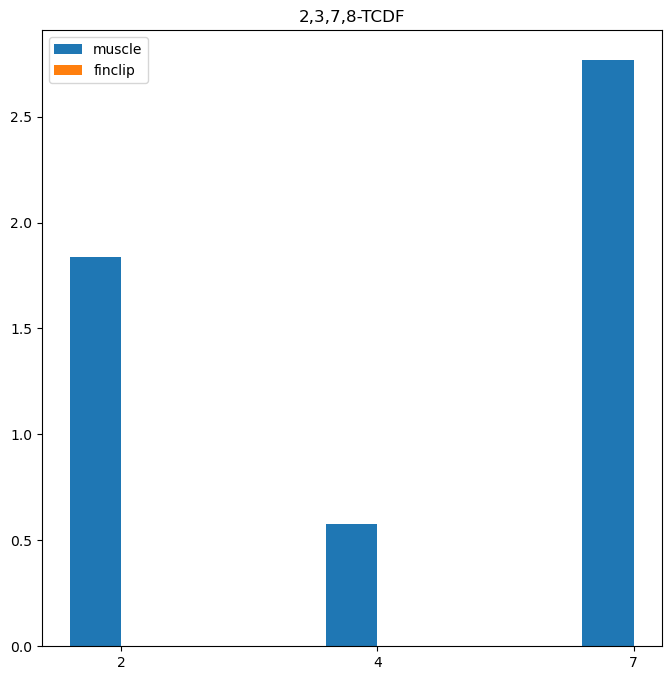

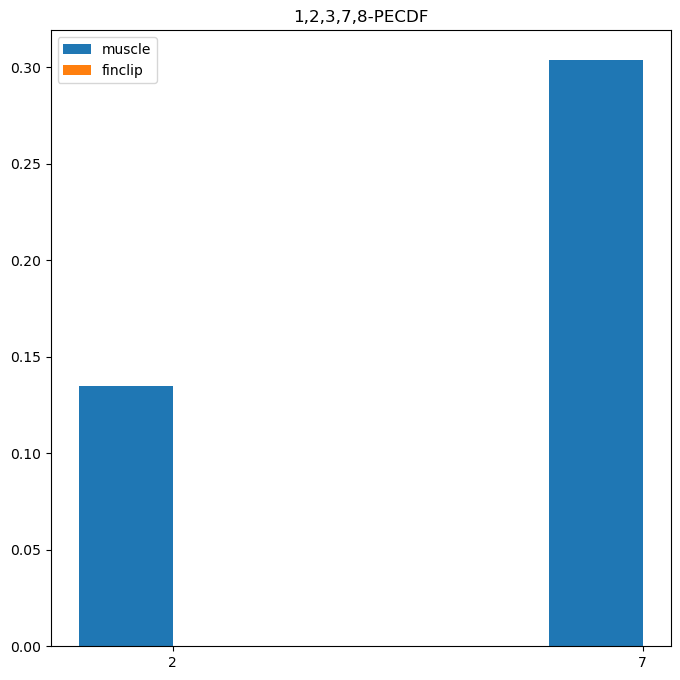

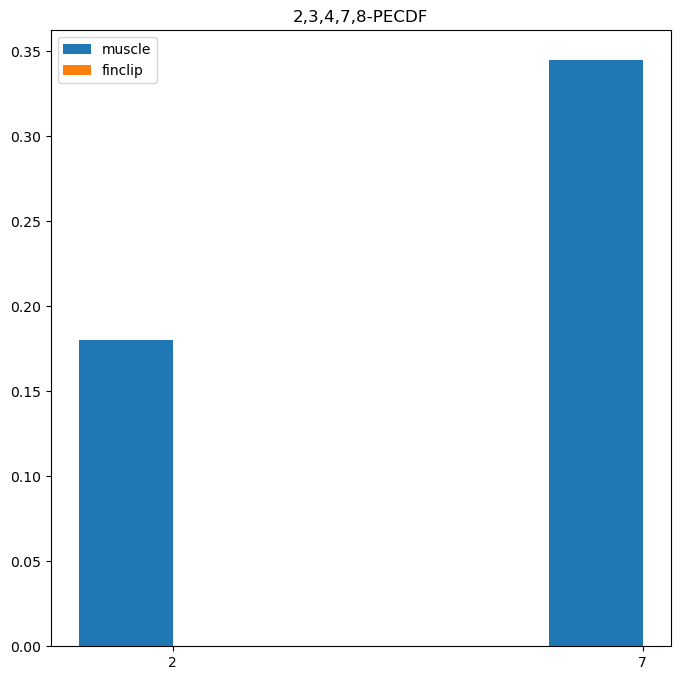

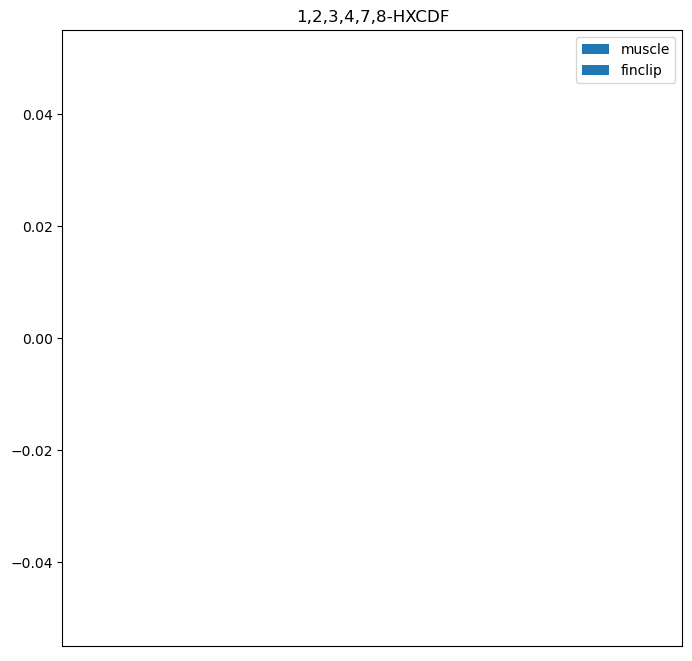

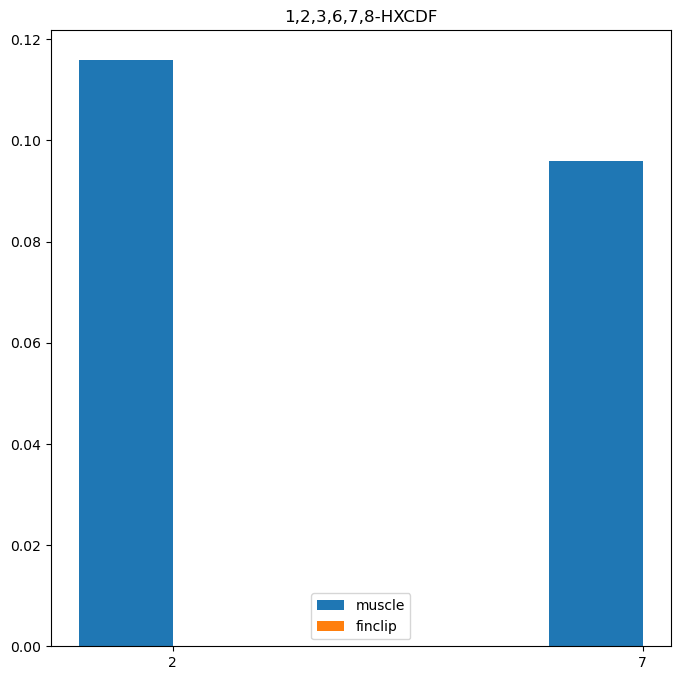

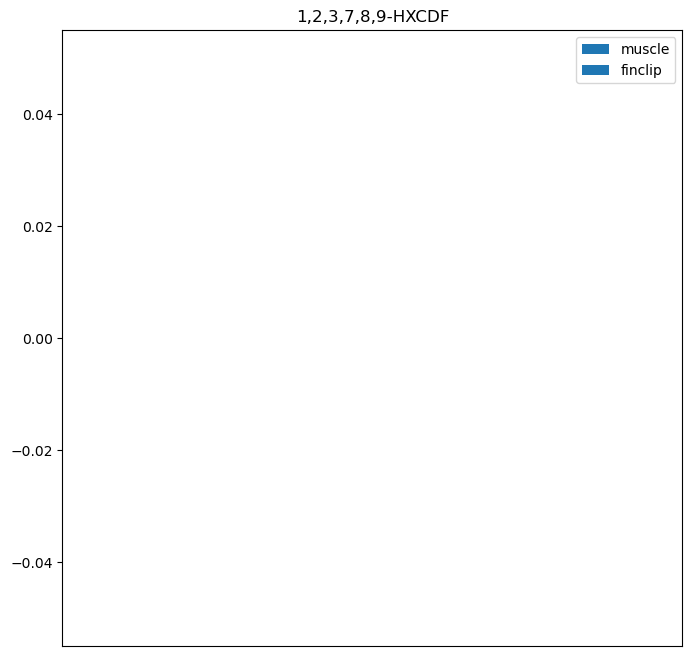

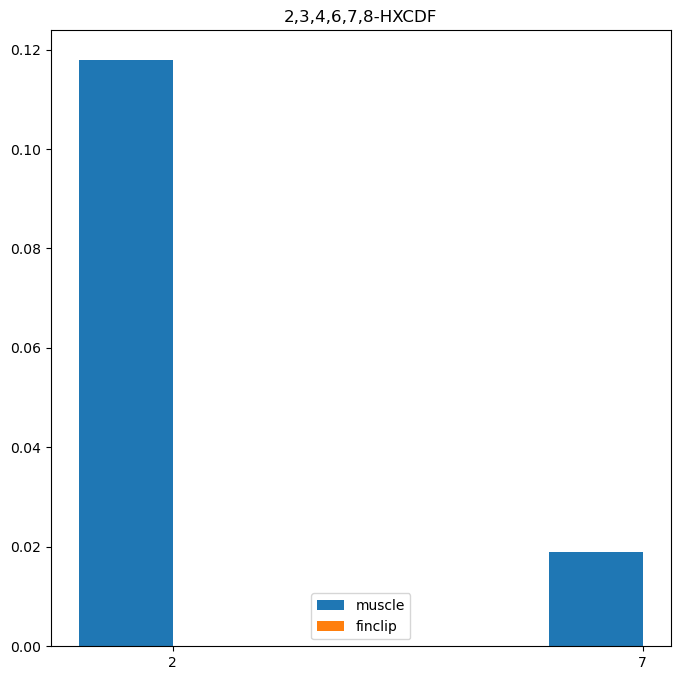

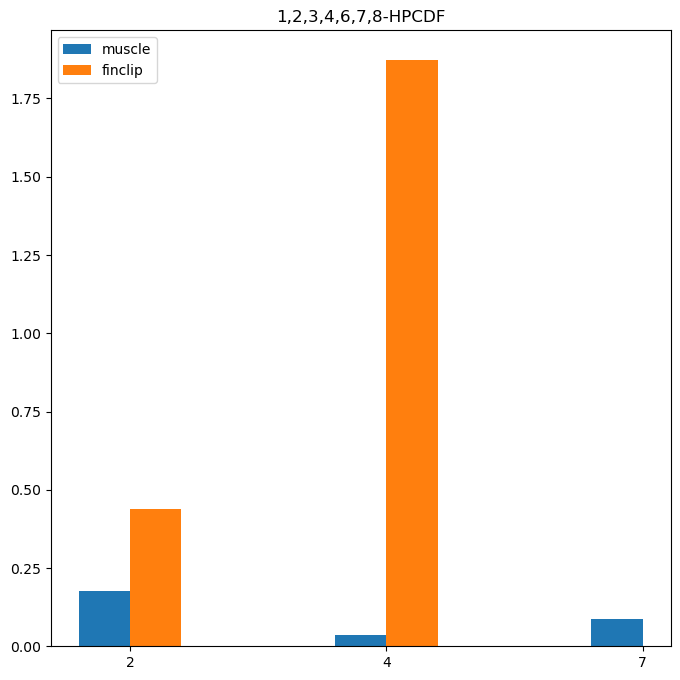

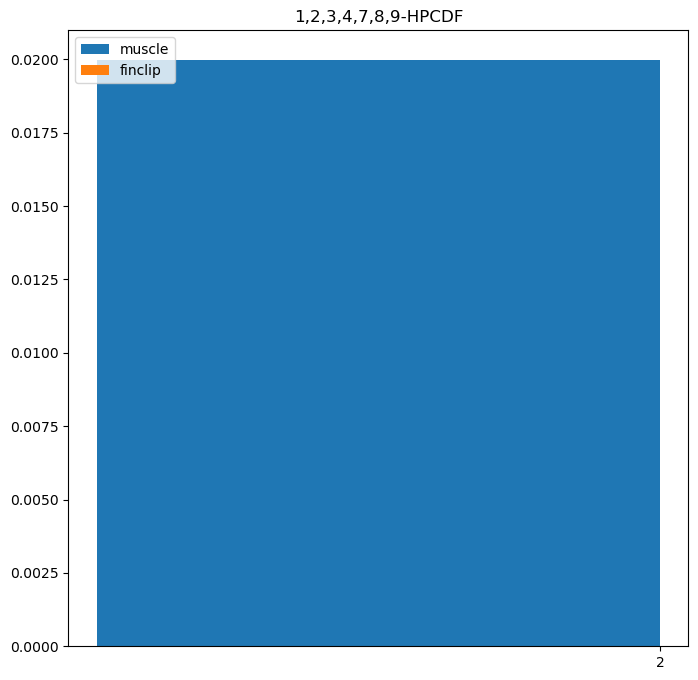

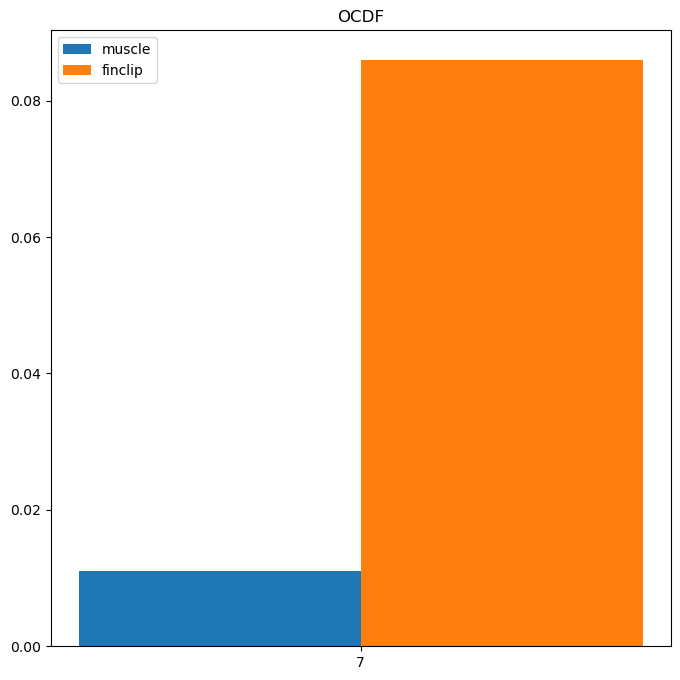

In [35]:
t = blankcorrect_table.copy()
width = 0.2
for r in t["CLIENT_ID"].unique():
    plt.figure(facecolor='white', figsize = (8, 8))
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]].dropna(axis=1)
    x = np.arange(len(temp.columns)) - (width/2)
    plt.xticks(np.arange(len(temp.columns)), temp.columns)
    y = temp.to_numpy("float")[0]

    plt.bar(x,y, width=width, label = "muscle")


    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    
    y = temp.to_numpy("float")[0]
    
    plt.bar(x + width,y, width=width, label = "finclip")
    plt.title(f'{r}')
    plt.legend()
    


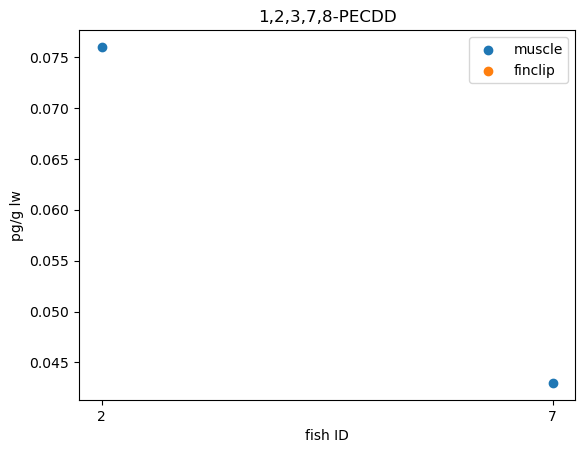

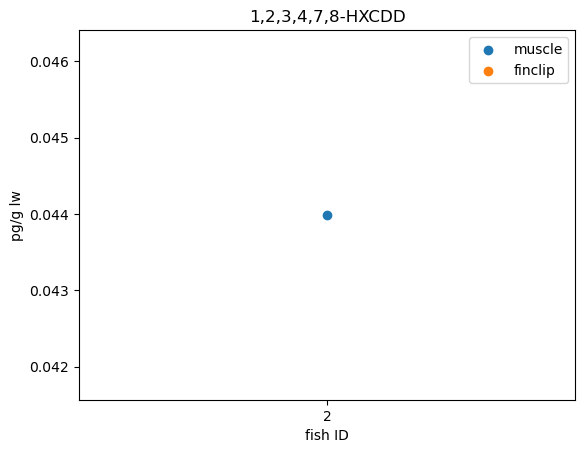

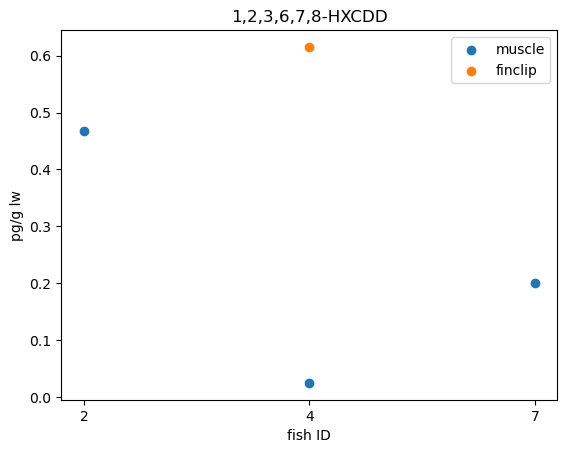

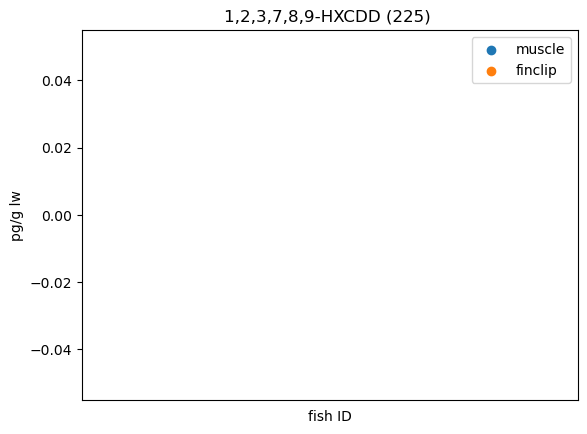

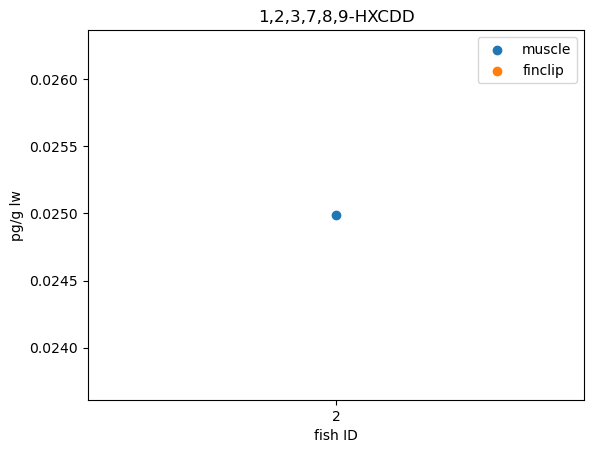

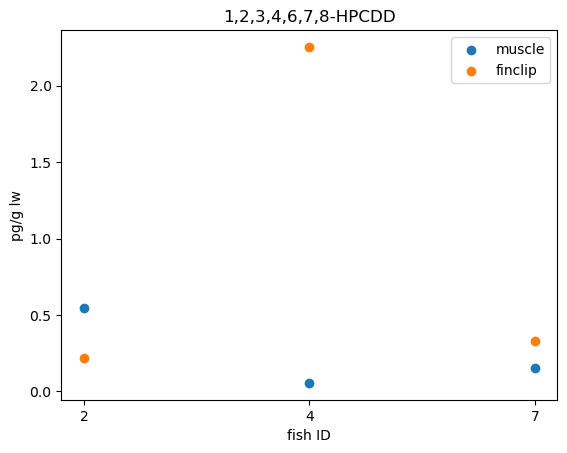

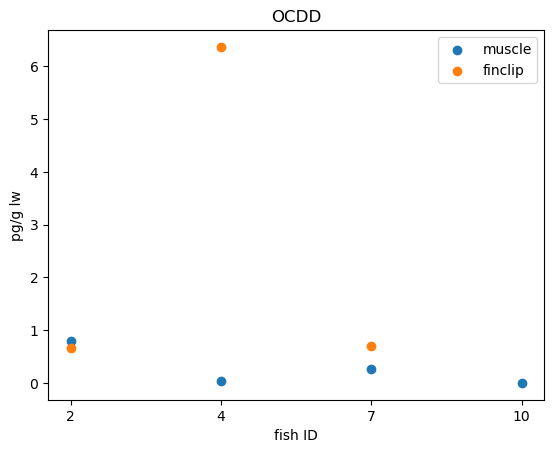

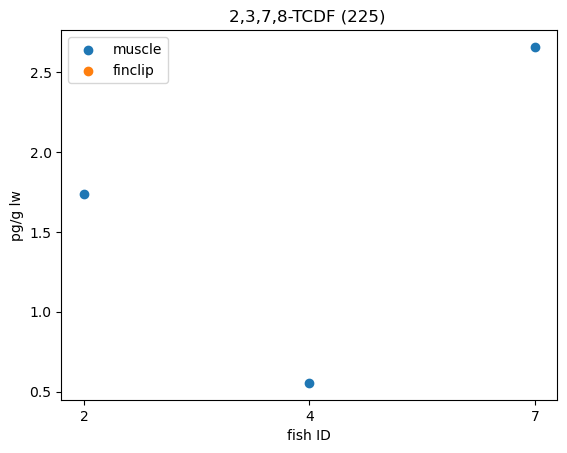

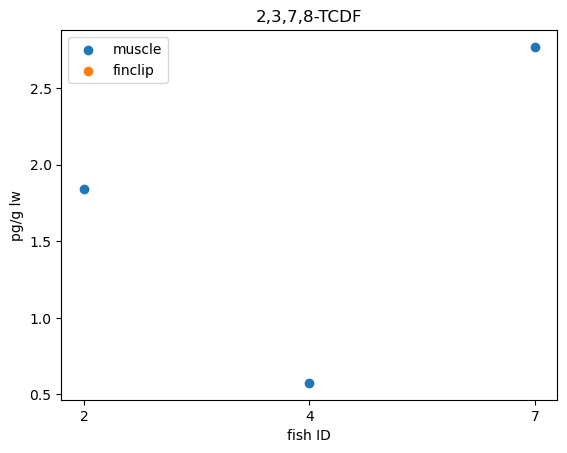

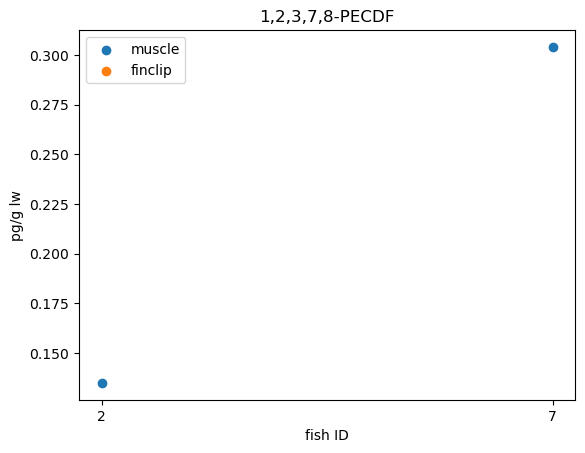

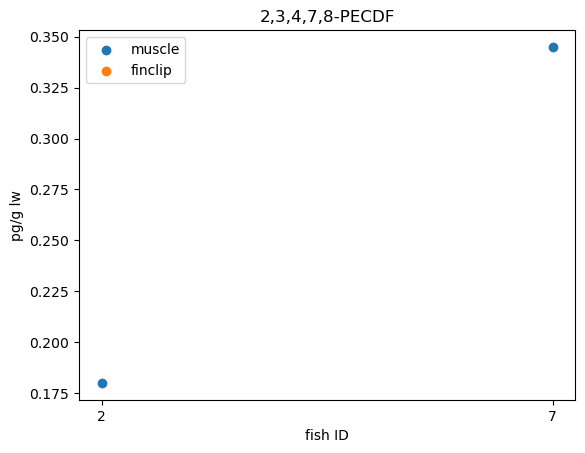

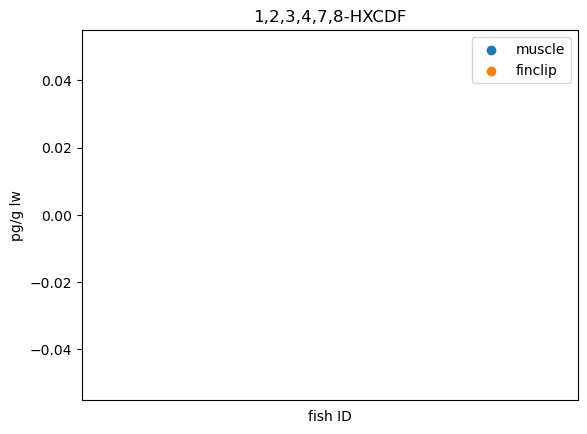

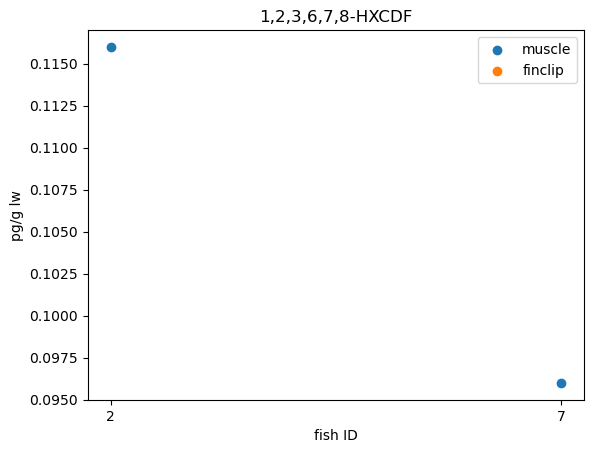

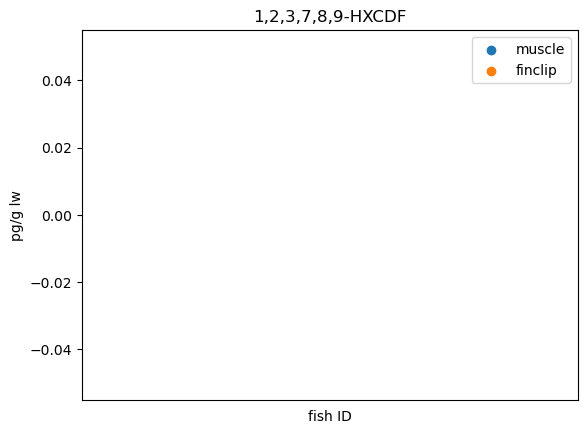

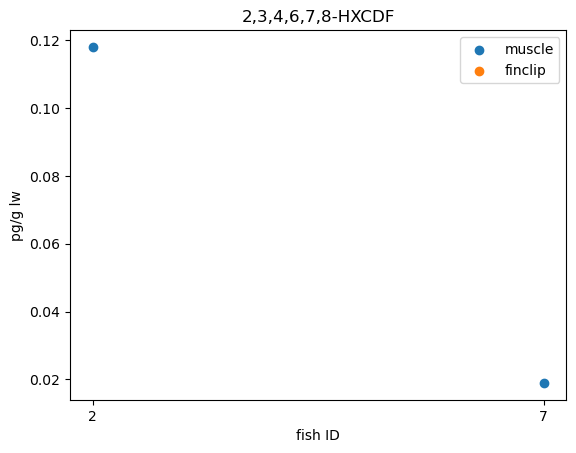

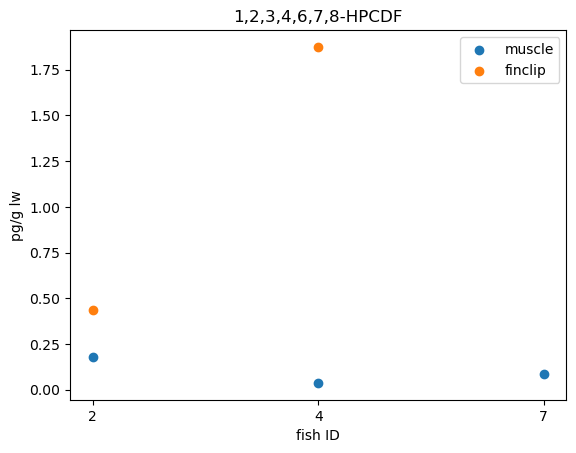

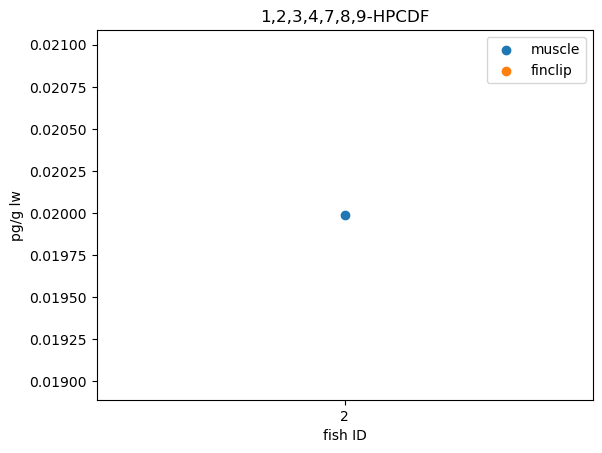

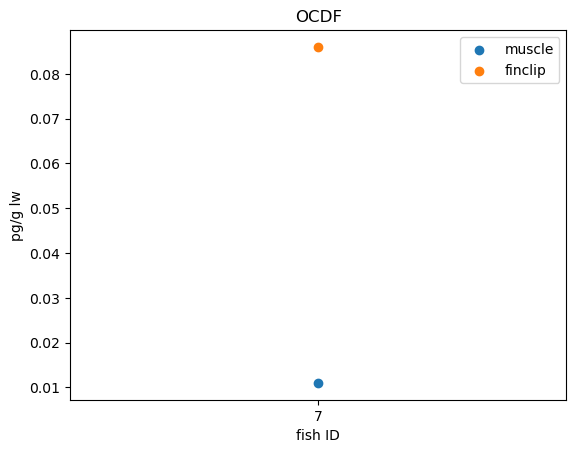

In [36]:
t = blankcorrect_table.copy()

for r in t["CLIENT_ID"].unique():
    plt.figure(facecolor='white')
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]].dropna(axis=1)
    x = np.arange(len(temp.columns)) 
    plt.xticks(np.arange(len(temp.columns)), temp.columns)
    y = temp.to_numpy("float")[0]
    plt.xlabel("fish ID")
    plt.ylabel("pg/g lw")
    plt.scatter(x,y, label = "muscle")
    

    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    
    y = temp.to_numpy("float")[0]
    
    plt.scatter(x,y, label = "finclip")
    plt.title(f'{r}')
    plt.legend()

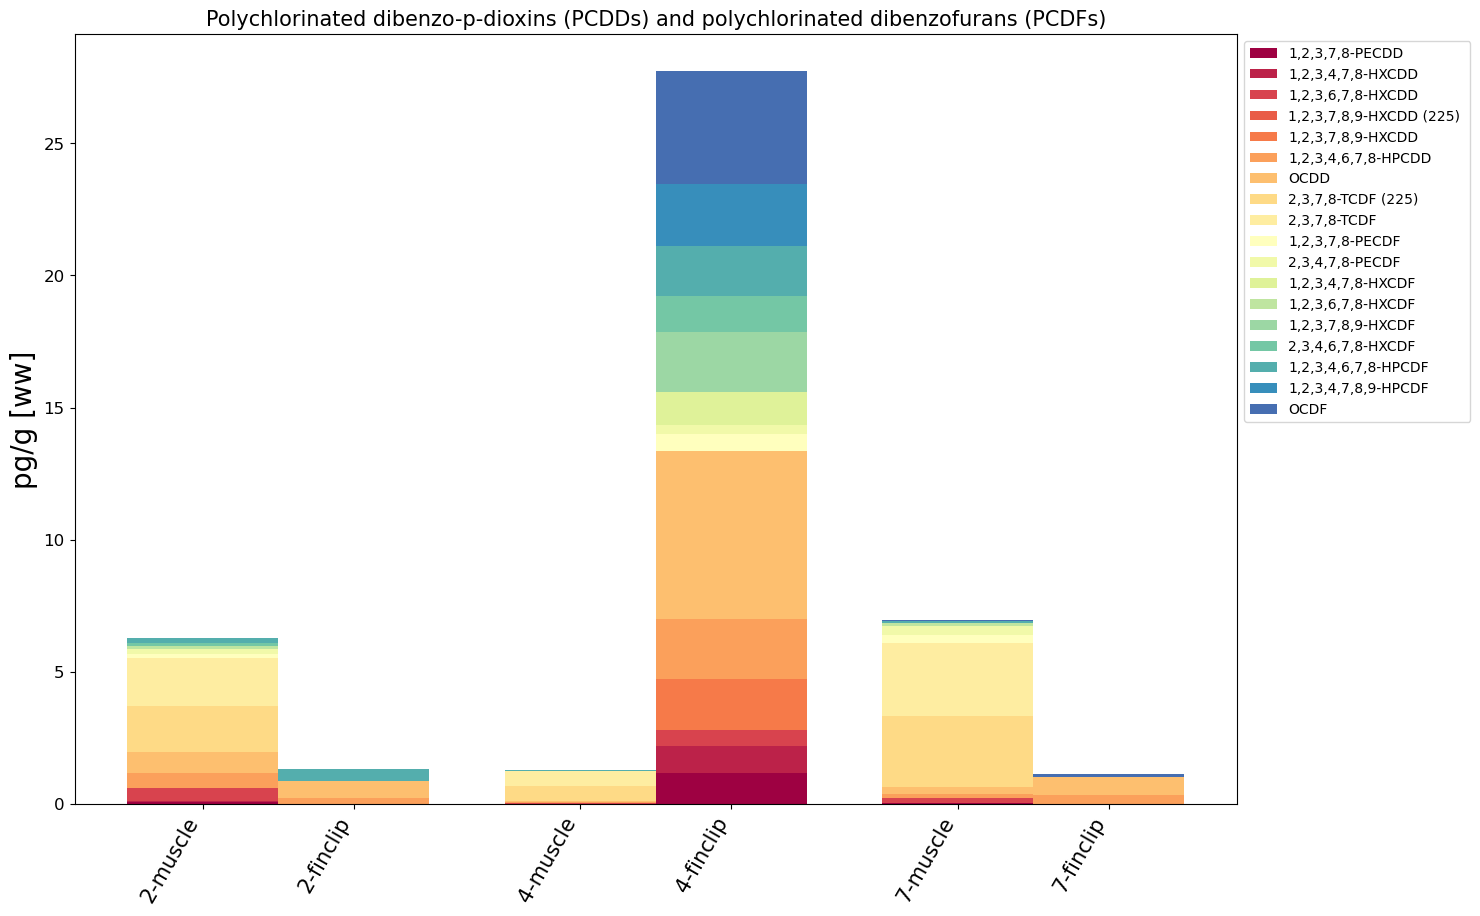

In [37]:
t = blankcorrect_table.copy()
t.set_index('CLIENT_ID', inplace = True)
#t = t.loc[:, t.sum(axis=0) != 0]
t = t.loc[:, t.loc[t.tag == 'muscle', :].sum(axis=0) != 0] # for removing the rest (without muscle)
t.reset_index(inplace = True)
x = np.arange(len(t.columns[2:]))*2
width = 0.8
bottom1 = 0 #muslce
bottom2 = 0 #finclip

plt.figure(facecolor='white', figsize=(15, 10))
plt.xticks(np.r_[x+(width/2), x-(width/2)], np.r_[t.columns[2:]+"-finclip", t.columns[2:]+"-muscle"], rotation = 60, ha = 'right', fontsize = 15)
cmap = plt.get_cmap('Spectral')
z_c = len(t['CLIENT_ID'].unique())
for i, r in enumerate(t["CLIENT_ID"].unique()):
    color = cmap(i/z_c)
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]]
    y = temp.to_numpy("float")[0]#/1000000
    plt.bar(x - (width/2),y, width=width, color = color, bottom = bottom1)
    y[np.isnan(y)] = 0
    bottom1 = y + bottom1

    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    y = temp.to_numpy("float")[0]#/1000000
    plt.bar(x + width/2, y, width=width, label = f"{r}", color = color, bottom = bottom2)
    y[np.isnan(y)] = 0
    bottom2 = y + bottom2
    
    plt.title('Polychlorinated dibenzo-p-dioxins (PCDDs) and polychlorinated dibenzofurans (PCDFs)', fontsize = 15)
    plt.legend(bbox_to_anchor = (1, 1))
plt.ylabel("pg/g [ww]", fontsize = 20)
plt.yticks(fontsize = 12);

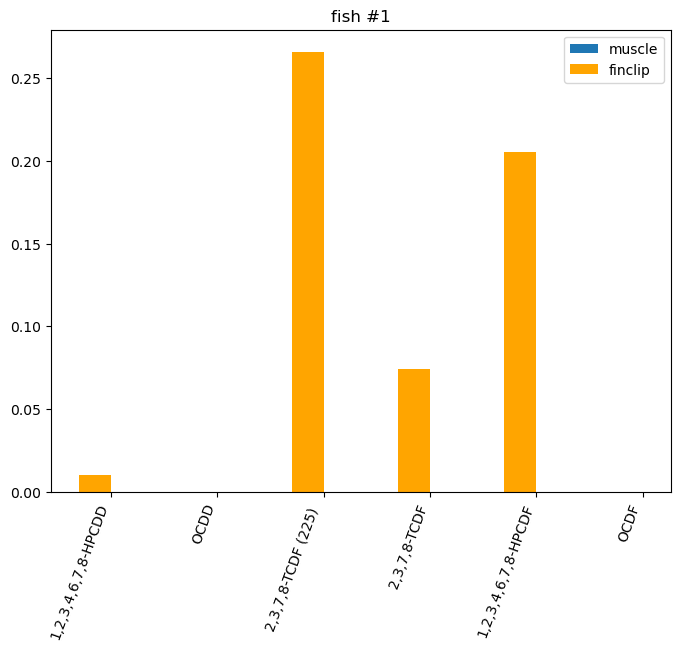

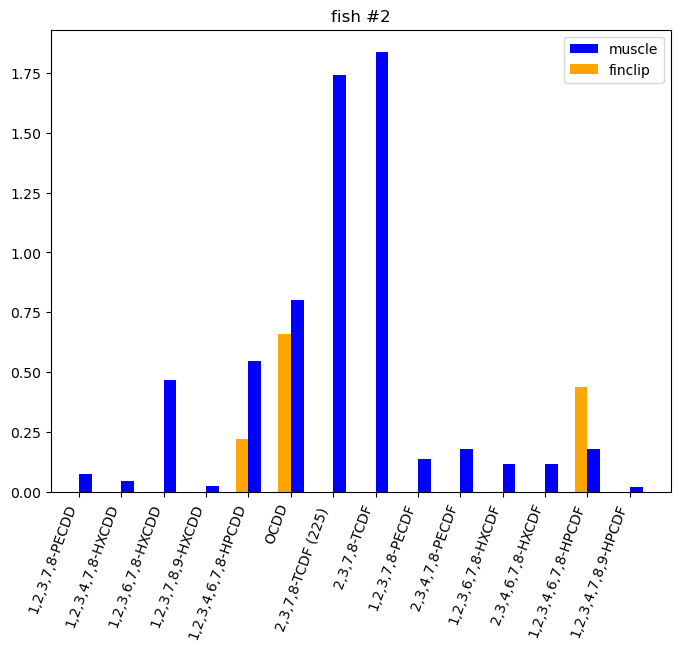

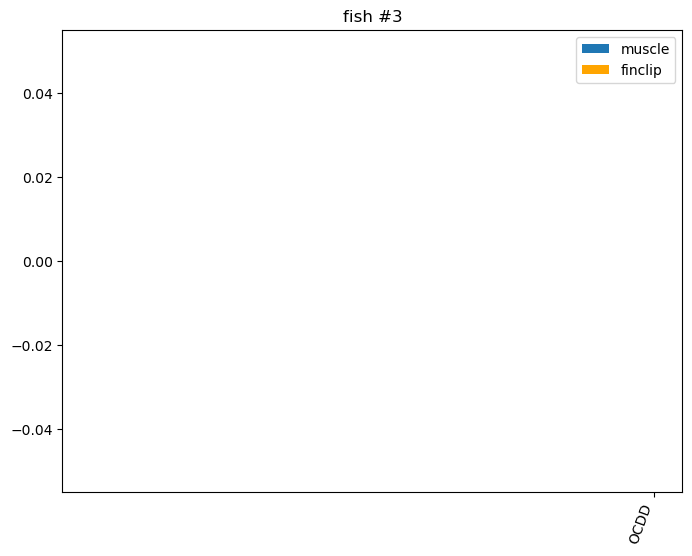

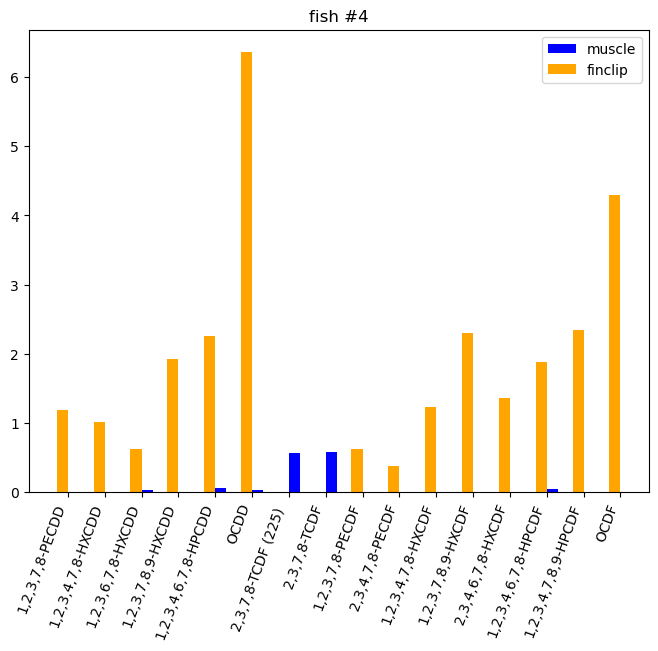

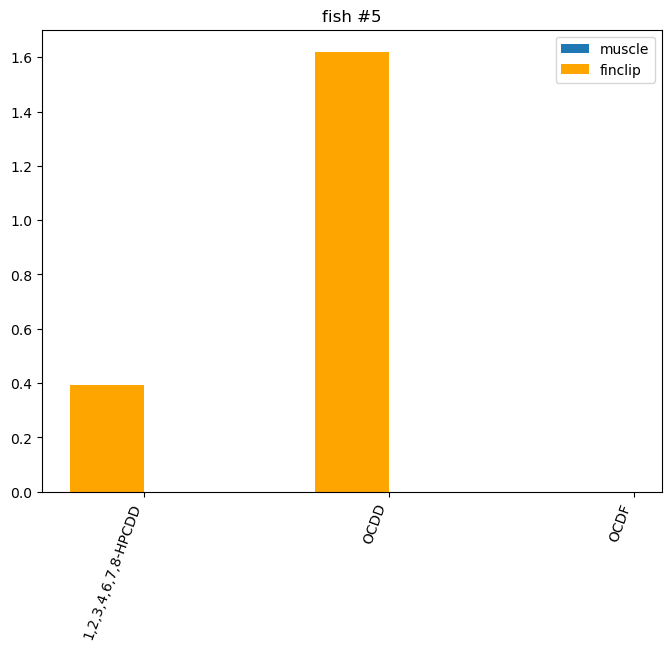

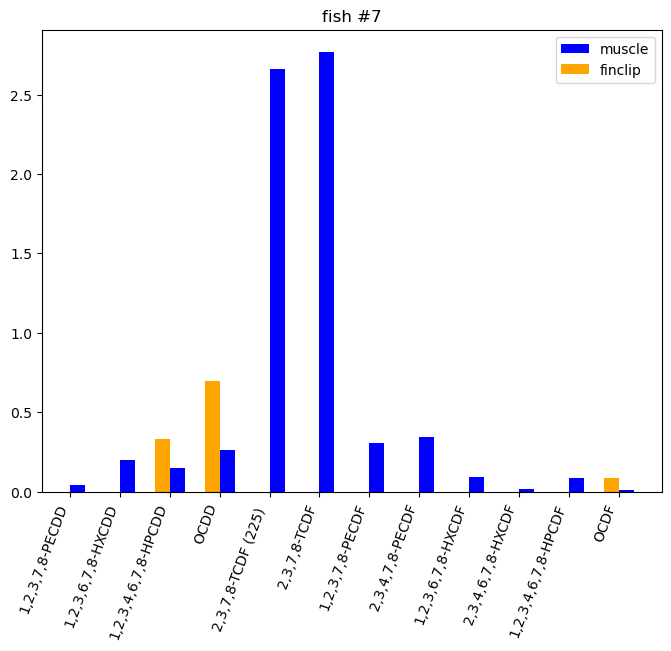

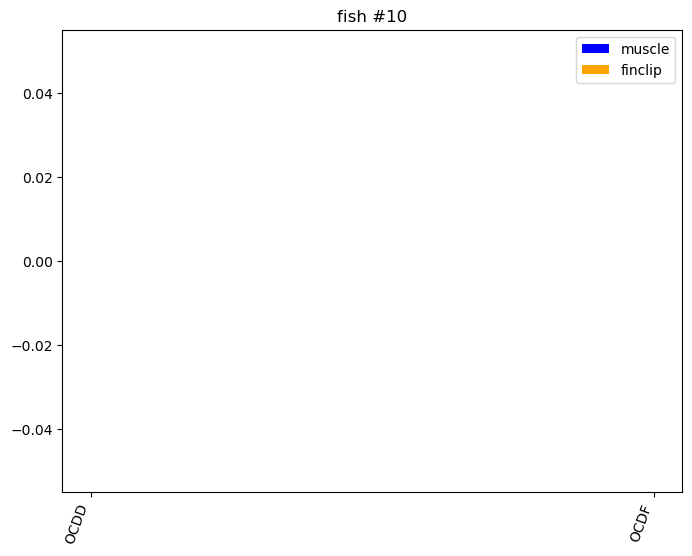

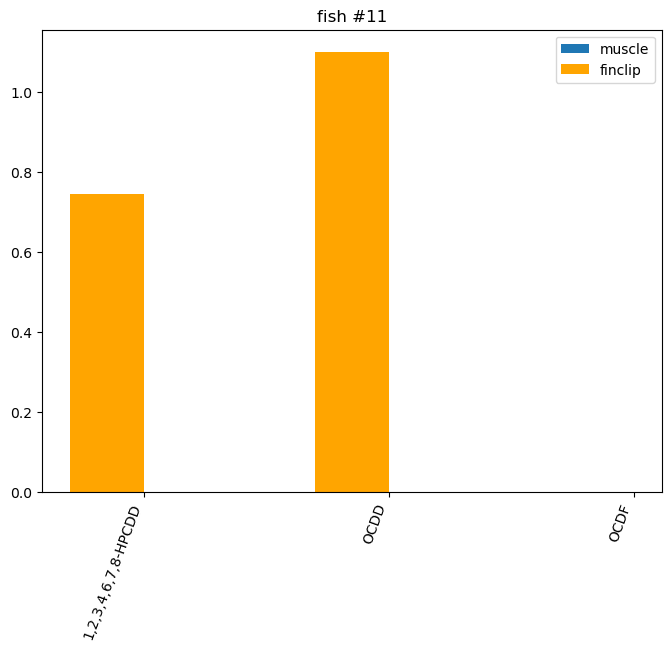

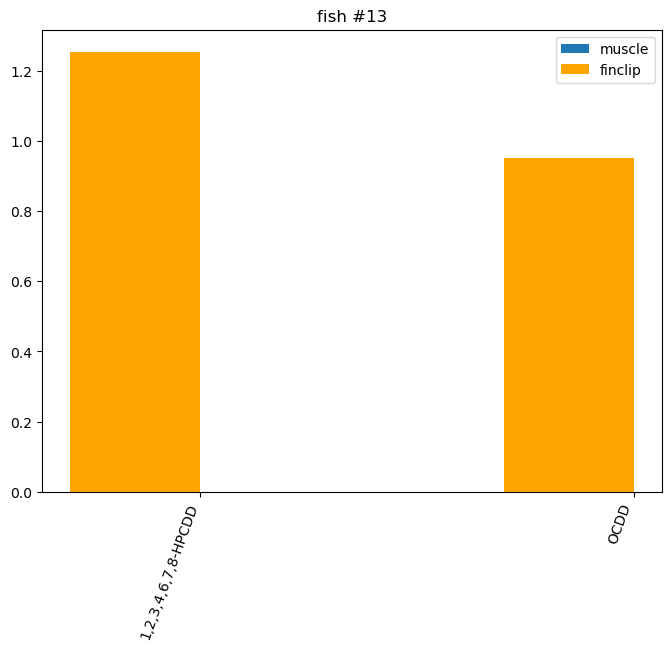

In [38]:
t = blankcorrect_table.copy()
width = 0.3
for c in t.columns[2:]:
    plt.figure(facecolor='white', figsize = (8, 6))
    temp = t[c].dropna() #removing NANs
    # temp = temp.loc[temp != 0]
    temp = t.loc[temp.index, :]
    x = t.loc[temp.index, 'CLIENT_ID'].unique()
    xx = np.arange(x.shape[0])
    plt.xticks(xx, labels = x, rotation = 70, ha = 'right')
    muscle_id = [i in temp.loc[temp['tag'] == 'muscle', "CLIENT_ID"].to_list() for i in x]
    finclip_id = [i in temp.loc[temp['tag'] == 'finclip', "CLIENT_ID"].to_list() for i in x]
    plt.bar(xx[muscle_id] + width/2, temp.loc[temp.tag == 'muscle', c].to_numpy('float'), width = width, color = 'blue', label = 'muscle')
    plt.bar(xx[finclip_id] - width/2, temp.loc[temp.tag == 'finclip', c].to_numpy('float'), width = width, color = 'orange', label = 'finclip')
    plt.title(f'fish #{c}')
    plt.legend();

## Lipid normalized plots

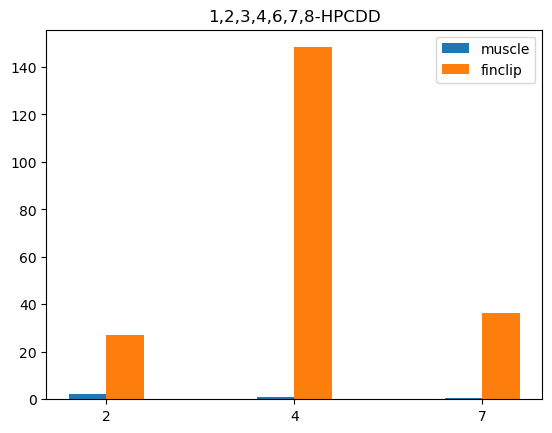

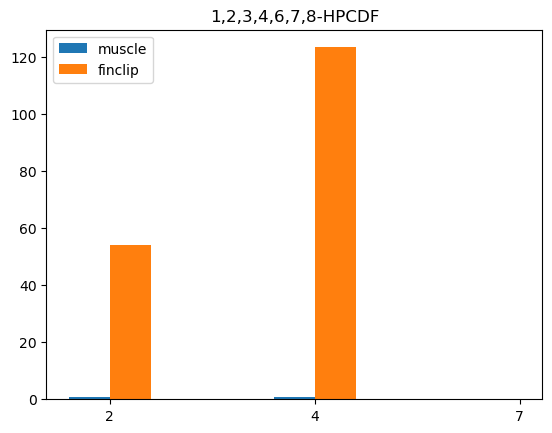

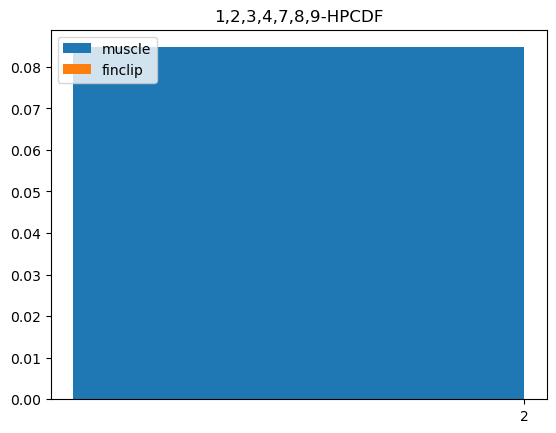

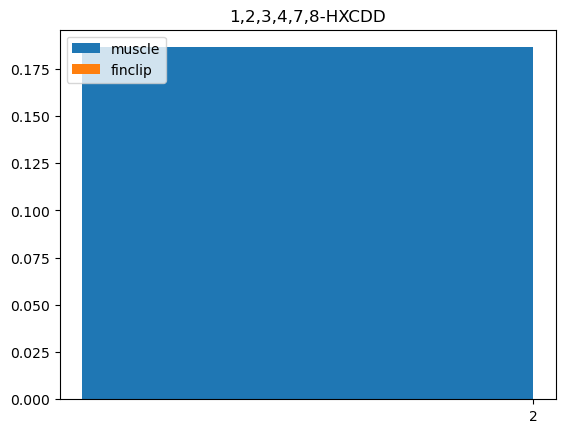

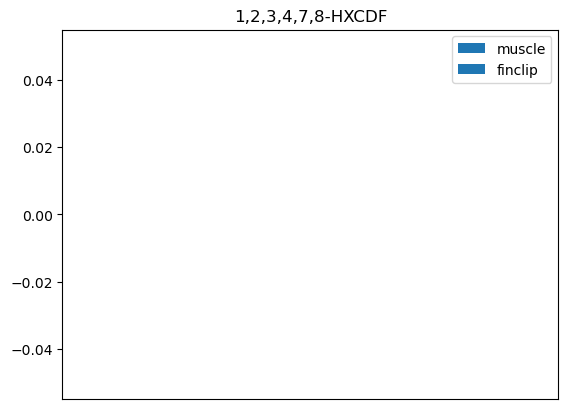

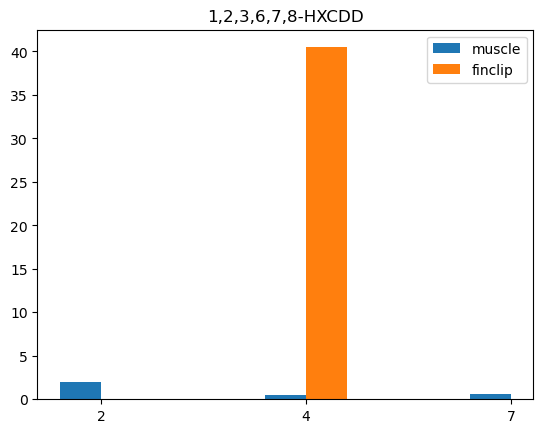

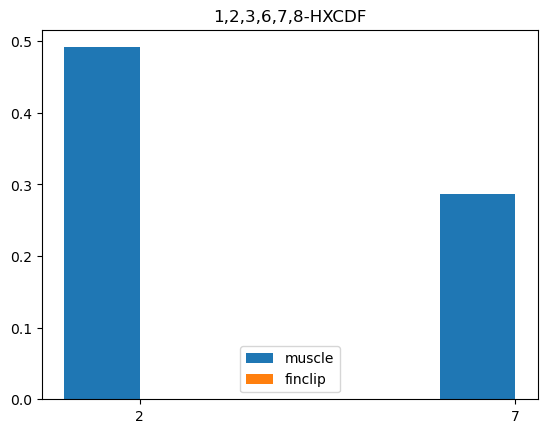

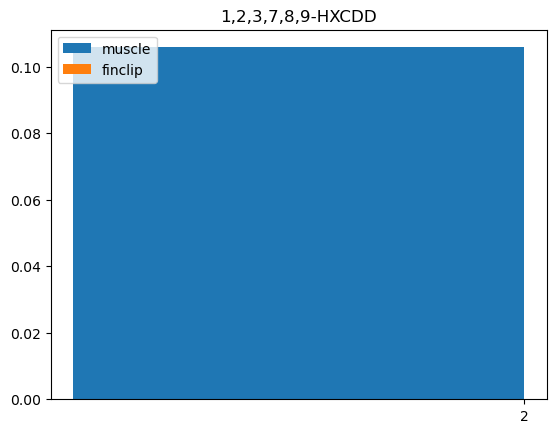

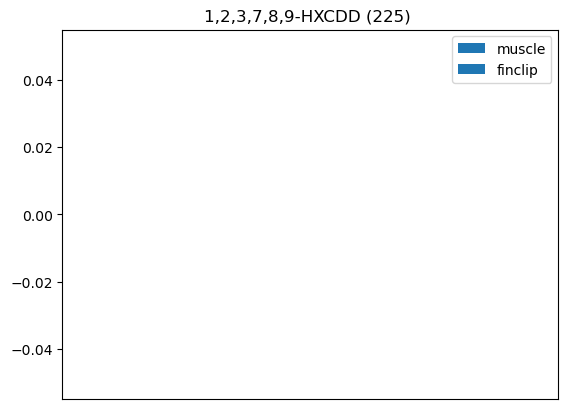

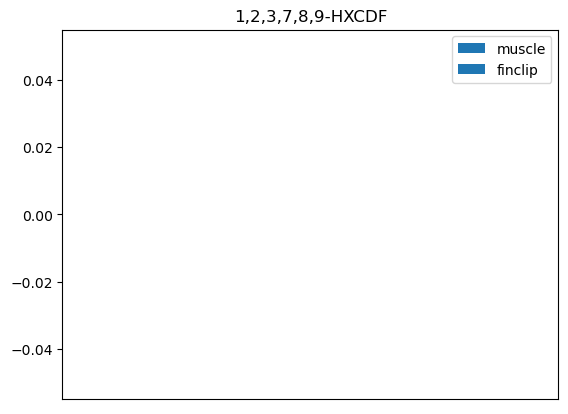

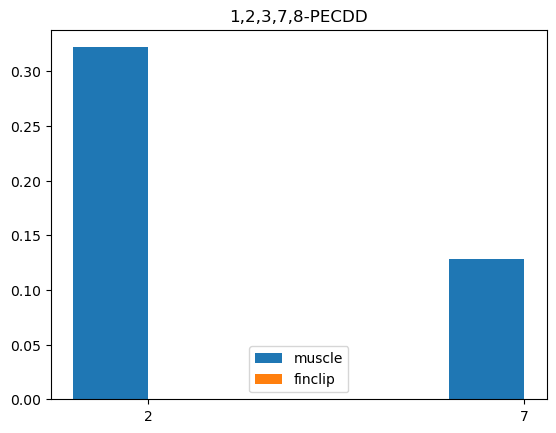

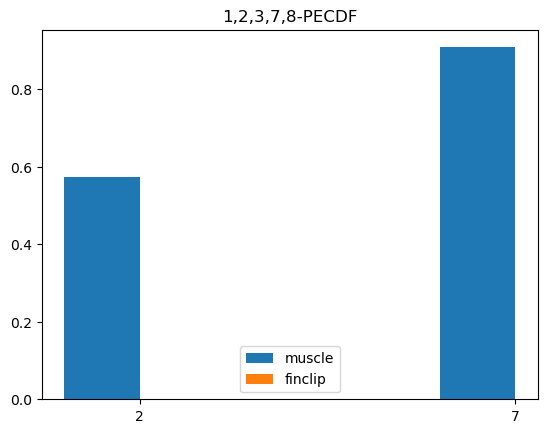

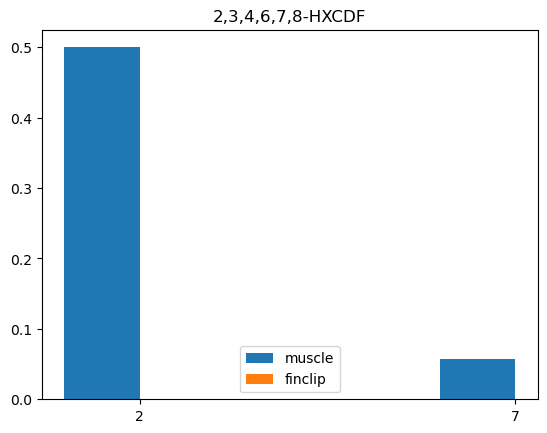

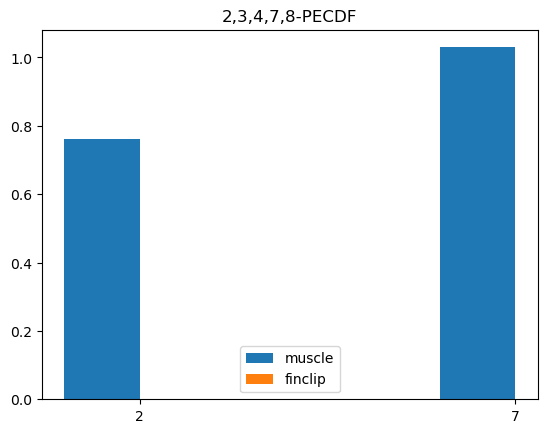

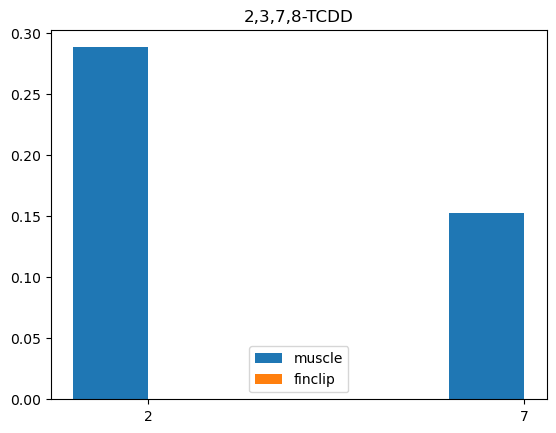

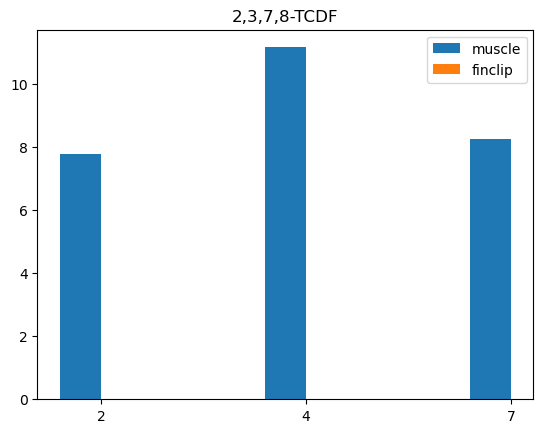

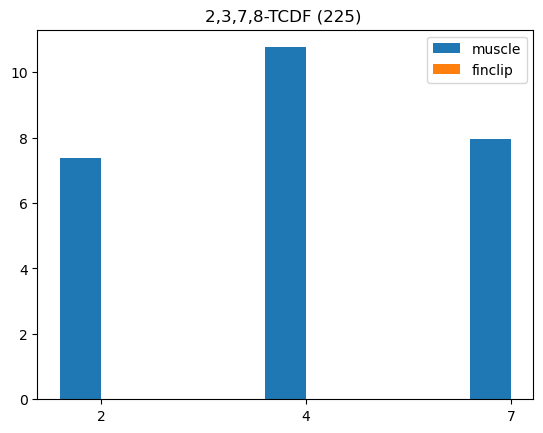

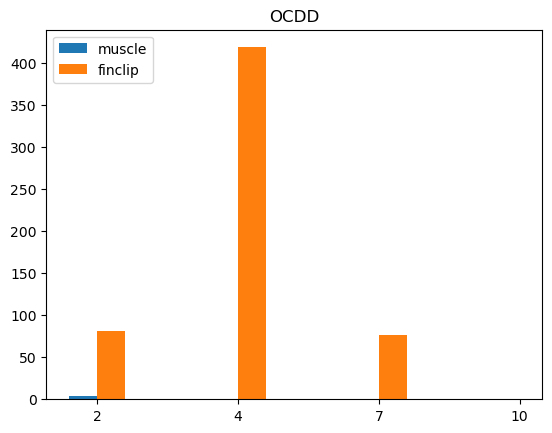

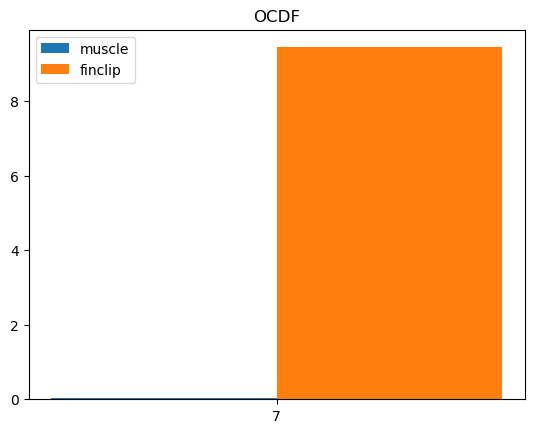

In [39]:
t= lipid_table.copy()
width = 0.2
for r in t["CLIENT_ID"].unique():
    plt.figure(facecolor='white')
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]].dropna(axis=1)
    x = np.arange(len(temp.columns)) - (width/2)
    plt.xticks(np.arange(len(temp.columns)), temp.columns)
    y = temp.to_numpy("float")[0]

    plt.bar(x,y, width=width, label = "muscle")


    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    
    y = temp.to_numpy("float")[0]
    
    plt.bar(x + width,y, width=width, label = "finclip")
    plt.title(f'{r}')
    plt.legend()
    


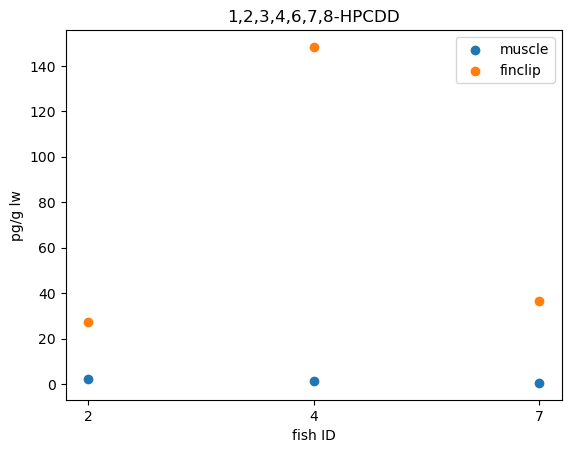

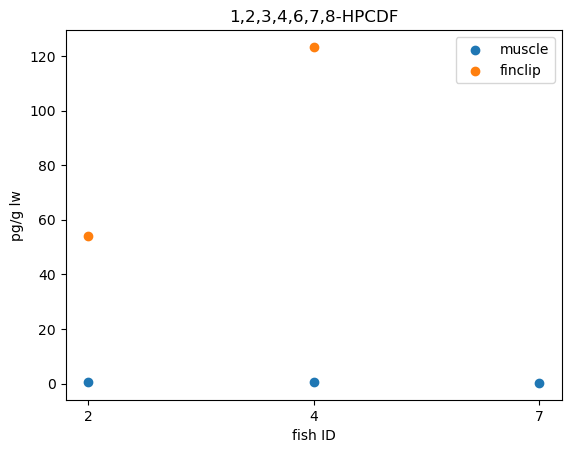

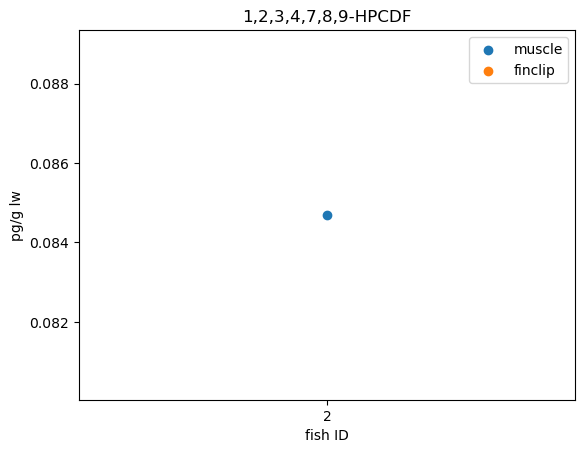

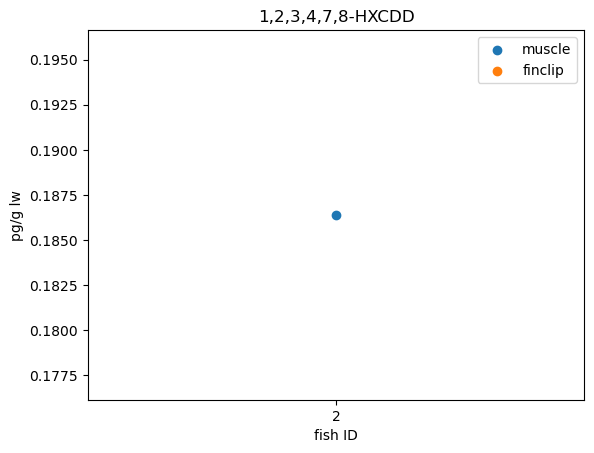

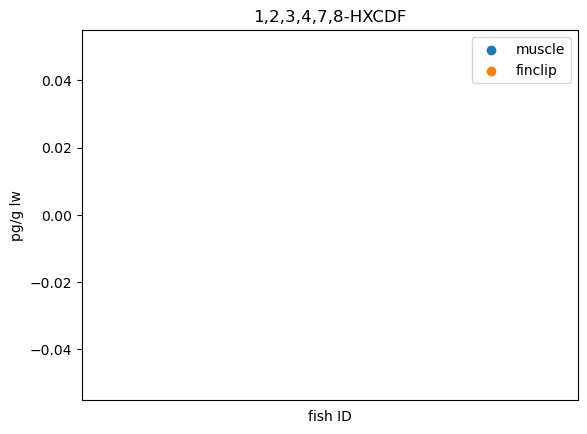

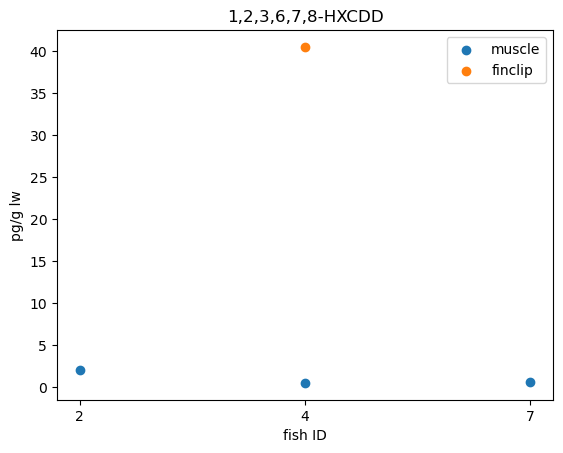

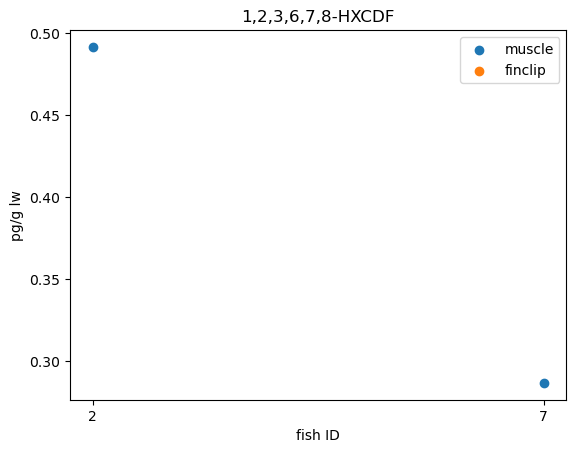

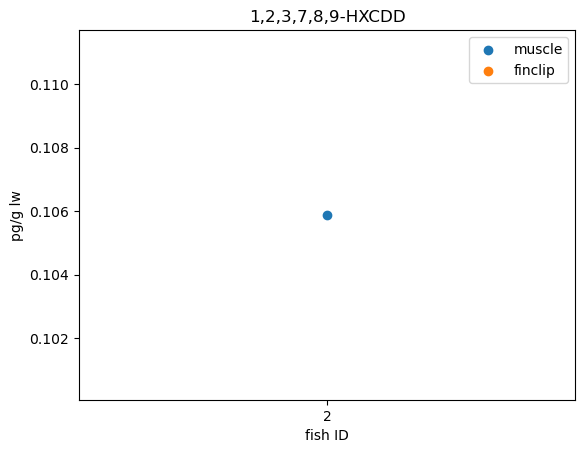

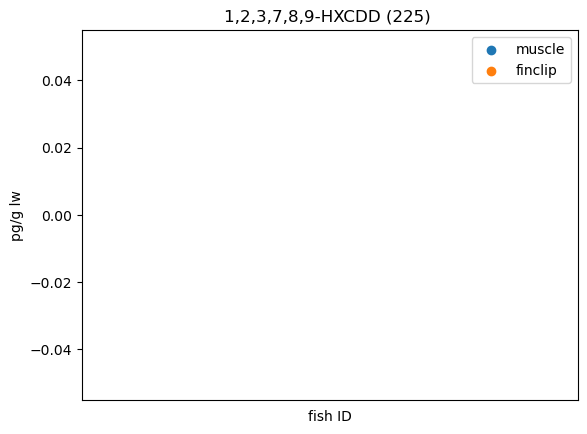

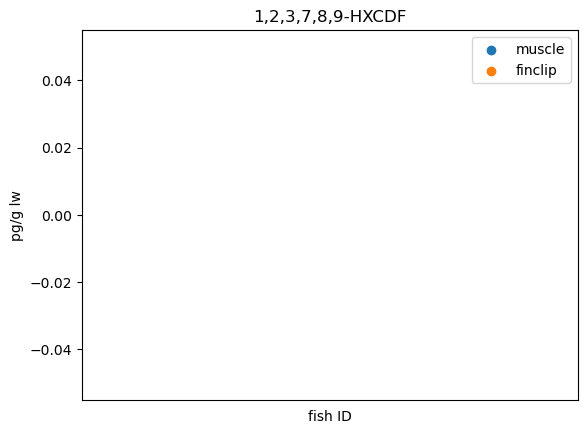

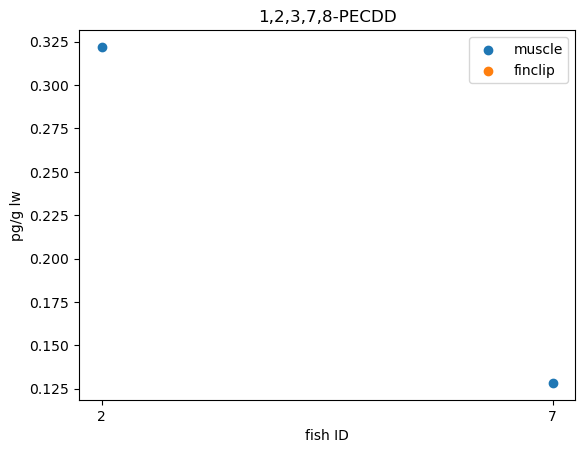

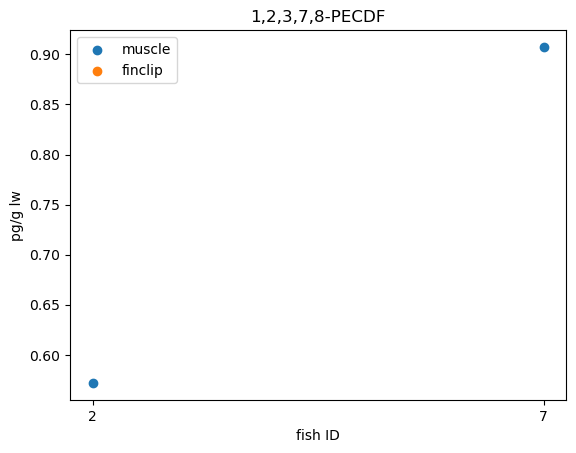

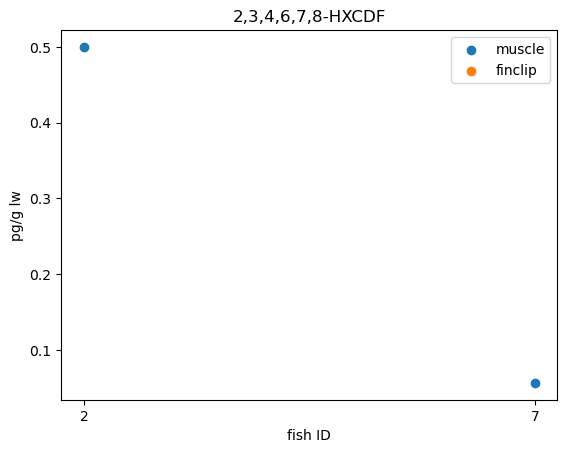

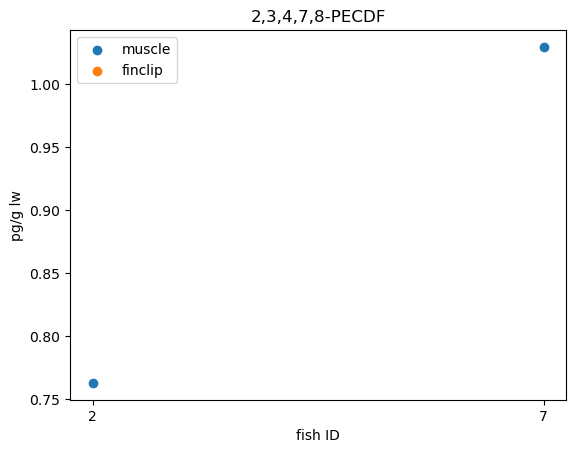

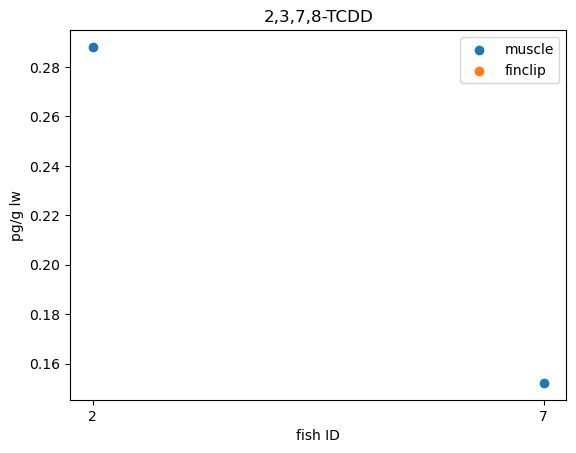

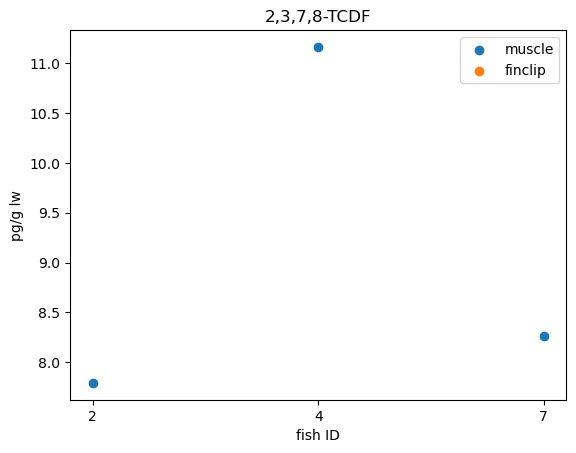

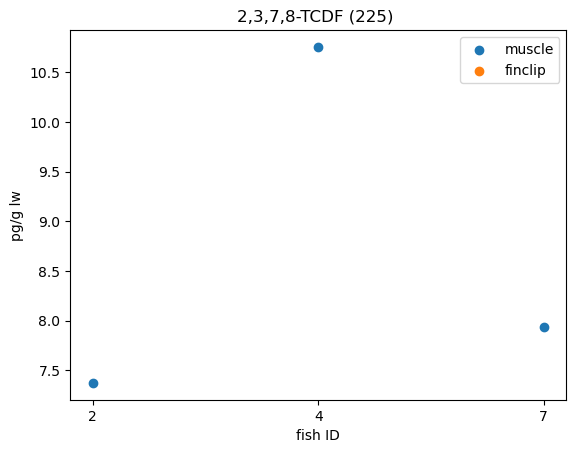

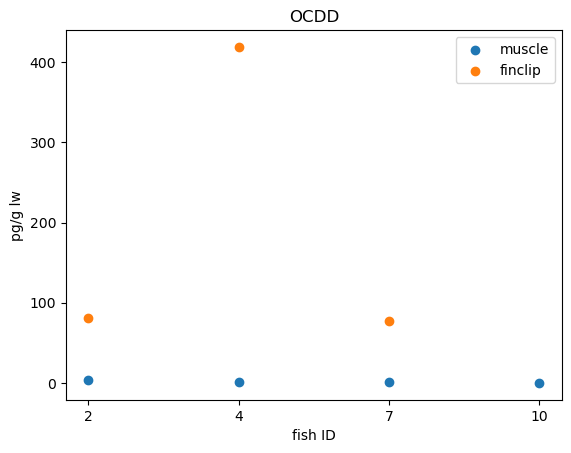

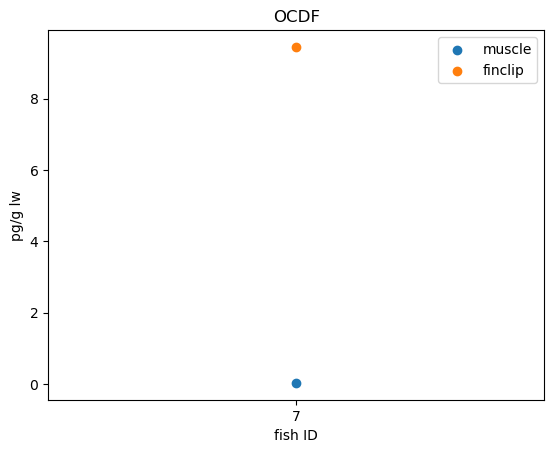

In [40]:
t = lipid_table.copy()

for r in t["CLIENT_ID"].unique():
    plt.figure(facecolor='white')
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]].dropna(axis=1)
    x = np.arange(len(temp.columns)) 
    plt.xticks(np.arange(len(temp.columns)), temp.columns)
    y = temp.to_numpy("float")[0]
    plt.xlabel("fish ID")
    plt.ylabel("pg/g lw")
    plt.scatter(x,y, label = "muscle")
    

    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    
    y = temp.to_numpy("float")[0]
    
    plt.scatter(x,y, label = "finclip")
    plt.title(f'{r}')
    plt.legend()

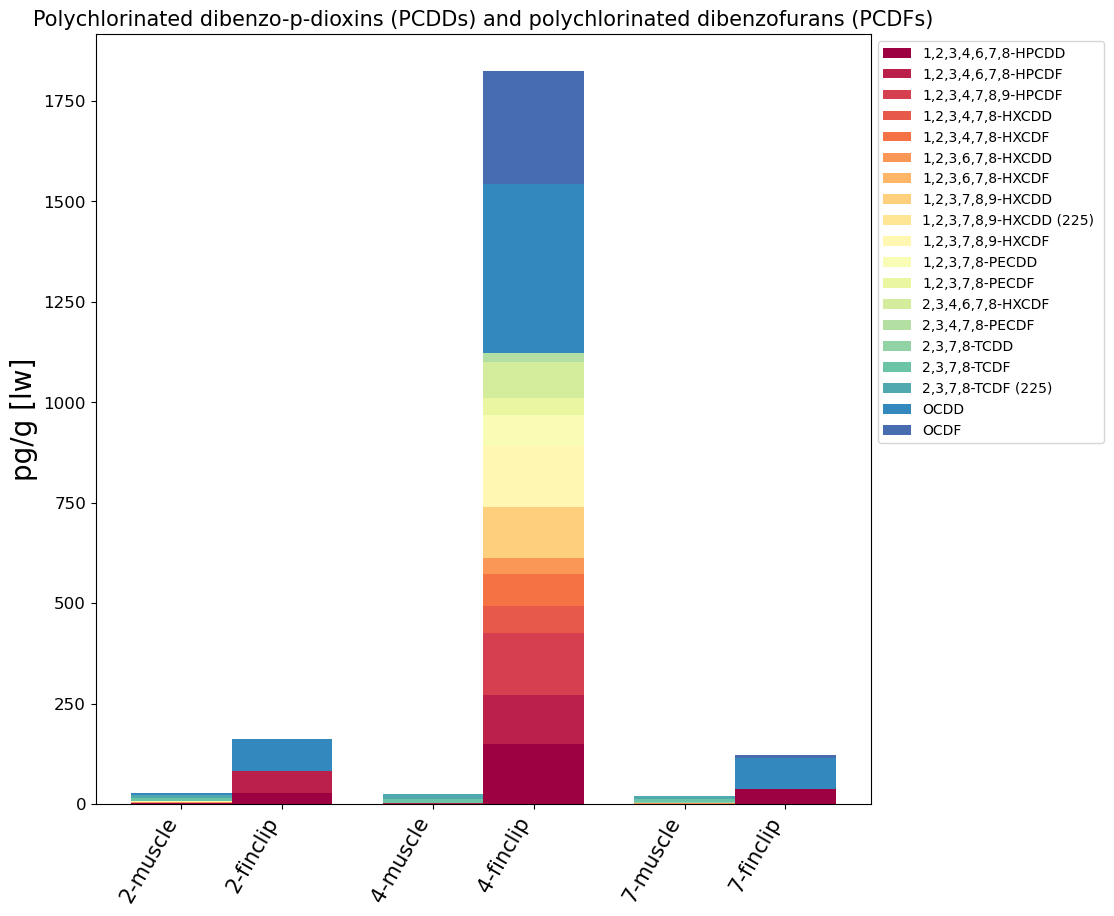

In [44]:
t = lipid_table.copy()
#t = t.loc[:, t.sum(axis=0) != 0]
t = t.loc[:, t.loc[t.tag == 'muscle', :].sum(axis=0) != 0] # for removing the rest (without muscle)

x = np.arange(len(t.columns[2:]))*2
width = 0.8
bottom1 = 0 #muslce
bottom2 = 0 #finclip

plt.figure(facecolor='white', figsize=(10, 10))
plt.xticks(np.r_[x+(width/2), x-(width/2)], np.r_[t.columns[2:]+"-finclip", t.columns[2:]+"-muscle"], rotation = 60, ha = 'right', fontsize = 15)
cmap = plt.get_cmap('Spectral')
z_c = len(t['CLIENT_ID'].unique())
for i, r in enumerate(t["CLIENT_ID"].unique()):
    color = cmap(i/z_c)
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]]
    y = temp.to_numpy("float")[0]#/1000000
    plt.bar(x - (width/2),y, width=width, color = color, bottom = bottom1)
    y[np.isnan(y)] = 0
    bottom1 = y + bottom1

    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    y = temp.to_numpy("float")[0]#/1000000
    plt.bar(x + width/2, y, width=width, label = f"{r}", color = color, bottom = bottom2)
    y[np.isnan(y)] = 0
    bottom2 = y + bottom2
    
    plt.title('Polychlorinated dibenzo-p-dioxins (PCDDs) and polychlorinated dibenzofurans (PCDFs)', fontsize = 15)
    plt.legend(bbox_to_anchor = (1, 1))
plt.ylabel("pg/g [lw]", fontsize = 20)
plt.yticks(fontsize = 12);

### each individual fish

In [ ]:
t = lipid_table.copy()
width = 0.3
for c in t.columns[2:]:
    plt.figure(facecolor='white', figsize = (8, 6))
    temp = t[c].dropna() #removing NANs
    # temp = temp.loc[temp != 0]
    temp = t.loc[temp.index, :]
    x = t.loc[temp.index, 'CLIENT_ID'].unique()
    xx = np.arange(x.shape[0])
    plt.xticks(xx, labels = x, rotation = 70, ha = 'right')
    muscle_id = [i in temp.loc[temp['tag'] == 'muscle', "CLIENT_ID"].to_list() for i in x]
    finclip_id = [i in temp.loc[temp['tag'] == 'finclip', "CLIENT_ID"].to_list() for i in x]
    plt.bar(xx[muscle_id] + width/2, temp.loc[temp.tag == 'muscle', c].to_numpy('float'), width = width, color = 'blue', label = 'muscle')
    plt.bar(xx[finclip_id] - width/2, temp.loc[temp.tag == 'finclip', c].to_numpy('float'), width = width, color = 'orange', label = 'finclip')
    plt.title(f'fish #{c}')
    plt.legend();

# PCBs in fin clips vs muscle

### Blank Corrected

In [ ]:
muscle = pd.read_excel('MusclePCB.xlsx', sheet_name= 'DATA')

rlnd = muscle.loc[muscle.iloc[:,-6] == "ND", muscle.columns[-4]].dropna() #reporting limits who are NDs
muscle.loc[rlnd.index, muscle.columns[-5]] = rlnd.to_numpy('float32')/np.sqrt(2) #reporting limts /sqrt(2) instead of ND in Blank column

c = muscle.columns[~muscle.columns.str.contains("unnamed", case = False)]

muscle = muscle.iloc[:, [0] + list(range(2,len(muscle.columns), 3))] #all needed columns, removing extras
muscle.columns = c.str.removeprefix("Nechako mort #")
muscle.drop(index = [0,1,2,3,4], inplace = True) #deleting first 4 rows
muscle.drop(columns = 'Spiked Matrix (102)', inplace = True) #deleting Spiked Matrix (102)

muscle.set_index('CLIENT_ID', inplace = True) #change client_id column to index, it is not column anymore, cuase we want to change it to float
muscle = muscle.astype("float") #all table is now float
muscle.reset_index(inplace = True)
muscle.insert(1,"tag", "muscle") 


#blank correction: 

muscle.loc[~muscle["Lab Blank (101)"].isna(), muscle.columns[2:-1]] -= muscle.loc[~muscle["Lab Blank (101)"].isna(), muscle.columns[-1]].to_numpy('float')[:,np.newaxis] #columnwise
muscle.iloc[:, 2::] = muscle.iloc[:,2::].where((muscle.iloc[:,2::]>0) | (muscle.iloc[:, 2::].isna()), 0) #change - to 0
muscle.drop(index = muscle.index[muscle.CLIENT_ID.str.contains('recovery', case = False)], inplace=True)
muscle.drop(index = muscle.index[muscle.CLIENT_ID.str.contains('WHO')], inplace=True)
muscle.drop(columns='Lab Blank (101)', inplace = True)

#lipid normalization:
muscle_l = muscle.copy()
lipid= muscle_l.loc[muscle_l.CLIENT_ID.str.contains("lipid", case = False), :]
id = muscle_l.index.to_numpy() != lipid.index.to_numpy() 
muscle_l.loc[id,muscle_l.columns[2::]]/= muscle_l.loc[~id, muscle_l.columns[2::]].to_numpy('float')
muscle_l.drop(index = muscle_l.index[muscle_l.CLIENT_ID.str.contains('lipid', case = False)], inplace=True)
#muscle_l.where((muscle_l.iloc[:, 2:]>0) | (muscle_l.iloc[:, 2:].isna()), 0, inplace = True) #change - to 0

muscle_l


In [ ]:
finclip = pd.read_excel("./generated excels/pcb.xlsx", sheet_name="blank_corrected")
finclip.rename(columns={finclip.columns[0]: 'CLIENT_ID'}, inplace=True)
finclip.columns = finclip.columns.str.removesuffix("-Trembleur")
finclip.insert(1, 'tag', 'finclip')
finclip.head()

In [ ]:
pcb_blankcorrected = pd.concat([finclip, muscle], axis = 0)
pcb_blankcorrected.reset_index(drop=True, inplace=True)
pcb_blankcorrected.drop(index = pcb_blankcorrected.index[pcb_blankcorrected.CLIENT_ID.str.contains('Total', case = False)], inplace=True)
pcb_blankcorrected.drop(index = pcb_blankcorrected.index[pcb_blankcorrected.CLIENT_ID.str.contains('Decachloro Biphenyl', case = False)], inplace=True)
pcb_blankcorrected.drop(index = pcb_blankcorrected.index[pcb_blankcorrected.CLIENT_ID.str.contains('Lipid', case = False)], inplace = True)
pcb_blankcorrected.head()

In [ ]:
t = pcb_blankcorrected.copy()

t = t.loc[:, t.loc[t.tag == 'muscle', :].sum(axis=0) != 0] # for removing the rest (without muscle)
x = np.arange(len(t.columns[2:]))*2
width = 0.8
bottom1 = 0
bottom2 = 0
plt.figure(facecolor='white', figsize=(15, 10))
plt.xticks(np.r_[x+(width/2), x-(width/2)], np.r_[t.columns[2:]+"-finclip", t.columns[2:]+"-muscle"], rotation = 60, ha = 'right', fontsize = 12)
cmap = plt.get_cmap('Spectral')
z_c = len(t['CLIENT_ID'].unique())
for i, r in enumerate(t["CLIENT_ID"].unique()):
    color = cmap(i/z_c)
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]]
    y = temp.to_numpy("float")[0]/1000000
    plt.bar(x - (width/2),y, width=width, color = color, bottom = bottom1)
    y[np.isnan(y)] = 0
    bottom1 = bottom1 + y
    
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    y = temp.to_numpy("float")[0]/1000000
    plt.bar(x + width/2, y, width=width, label = f"{r}", color = color, bottom = bottom2)
    y[np.isnan(y)] = 0
    bottom2 = bottom2 + y
    
    plt.title('polychlorinated Biphenyl (PCBs)', fontsize = 20)
    #plt.legend(bbox_to_anchor = (1, 1), ncol = 4)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=209))
sm.set_array([])  # Setting an empty array to the color bar
cbar = plt.colorbar(sm, ticks=np.arange(1, 210, 16))
cbar.set_label('#polychlorinated Biphenyl (PCBs) congeners')

plt.ylabel("mg/kg [ww]", fontsize = 12)
plt.yticks(fontsize = 12);

### Lipid normalized

In [ ]:
finclip_l = pd.read_excel("./generated excels/pcb.xlsx", sheet_name="lipid_normalized")
finclip_l.rename(columns={finclip_l.columns[0]: 'CLIENT_ID'}, inplace=True)
finclip_l.columns = finclip_l.columns.str.removesuffix("-Trembleur")
finclip_l.insert(1, 'tag', 'finclip')
finclip_l.head()

In [ ]:
pcb_lipidnomalized = pd.concat([finclip_l, muscle_l], axis = 0)
pcb_lipidnomalized.reset_index(drop=True, inplace=True)
pcb_lipidnomalized.drop(index = pcb_lipidnomalized.index[pcb_lipidnomalized.CLIENT_ID.str.contains('Total', case = False)], inplace=True)
pcb_lipidnomalized.drop(index = pcb_lipidnomalized.index[pcb_lipidnomalized.CLIENT_ID.str.contains('Decachloro Biphenyl', case = False)], inplace=True)
pcb_lipidnomalized.drop(index = pcb_lipidnomalized.index[pcb_lipidnomalized.CLIENT_ID.str.contains('Lipid', case = False)], inplace = True)
pcb_lipidnomalized.head()

In [ ]:
t = pcb_lipidnomalized.copy()

t = t.loc[:, t.loc[t.tag == 'muscle', :].sum(axis=0) != 0] # for removing the rest (without muscle)
x = np.arange(len(t.columns[2:]))*2
width = 0.8
bottom1 = 0
bottom2 = 0
plt.figure(facecolor='white', figsize=(15, 10))
plt.xticks(np.r_[x+(width/2), x-(width/2)], np.r_[t.columns[2:]+"-finclip", t.columns[2:]+"-muscle"], rotation = 60, ha = 'right', fontsize = 12)
cmap = plt.get_cmap('Spectral')
z_c = len(t['CLIENT_ID'].unique())
for i, r in enumerate(t["CLIENT_ID"].unique()):
    color = cmap(i/z_c)
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "muscle"), t.columns[2:]]
    y = temp.to_numpy("float")[0]/1000000
    plt.bar(x - (width/2),y, width=width, color = color, bottom = bottom1)
    y[np.isnan(y)] = 0
    bottom1 = bottom1 + y
    
    temp = t.loc[(t.CLIENT_ID == r) & (t.tag == "finclip"), temp.columns]
    y = temp.to_numpy("float")[0]/1000000
    plt.bar(x + width/2, y, width=width, label = f"{r}", color = color, bottom = bottom2)
    y[np.isnan(y)] = 0
    bottom2 = bottom2 + y
    
    plt.title('polychlorinated Biphenyl (PCBs)', fontsize = 20)
    # plt.legend(bbox_to_anchor = (1, 1), ncol = 4)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=209))
sm.set_array([])  # Setting an empty array to the color bar
cbar = plt.colorbar(sm, ticks=np.linspace(1, 209, 5).round(0))
cbar.set_label('#polychlorinated Biphenyl (PCBs) congeners')

plt.ylabel("mg/kg [lw]", fontsize = 12)
plt.yticks(fontsize = 12);

In [ ]:
from sklearn.feature_selection import mutual_info_regression
t = pcb_lipidnomalized
mutual = np.zeros(t['CLIENT_ID'].unique().shape, dtype='float32')
for i, anal in enumerate(t['CLIENT_ID'].unique()):
    x = t.loc[t['CLIENT_ID'] == anal, t.columns[1:]].dropna(axis=1)
    y = x.loc[x.tag == 'muscle', x.columns[2:]].to_numpy('float32').ravel()
    x = x.loc[x.tag == 'finclip', x.columns[2:]].to_numpy('float32')
    x = x.reshape(-1, 1)
    try:
        mutual[i] = mutual_info_regression(x, y, n_neighbors=2)
    except ValueError:
        mutual[i] = np.nan

df = pd.DataFrame({'analyte': t['CLIENT_ID'].unique(), 'mutual_info': mutual})
df.to_excel('mutual_info.xlsx', sheet_name='pcb_blankcorrected')